# **Big Mart Sales Prediction Challenge**
---
### **Objective:**
Predict sales of products at different Big Mart stores using machine learning.

## Importing Libraries & Loading Data

In [642]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load datasets
train_df = pd.read_csv('../data/Train.csv')
test_df = pd.read_csv('../data/Test.csv')

# Display basic info
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [643]:
print(f"train_shape: {train_df.shape}")
print(f"test_shape: {test_df.shape}")

train_shape: (8523, 12)
test_shape: (5681, 11)


In [644]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [645]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis (EDA)

## Univariate Analysis

<Figure size 864x576 with 0 Axes>

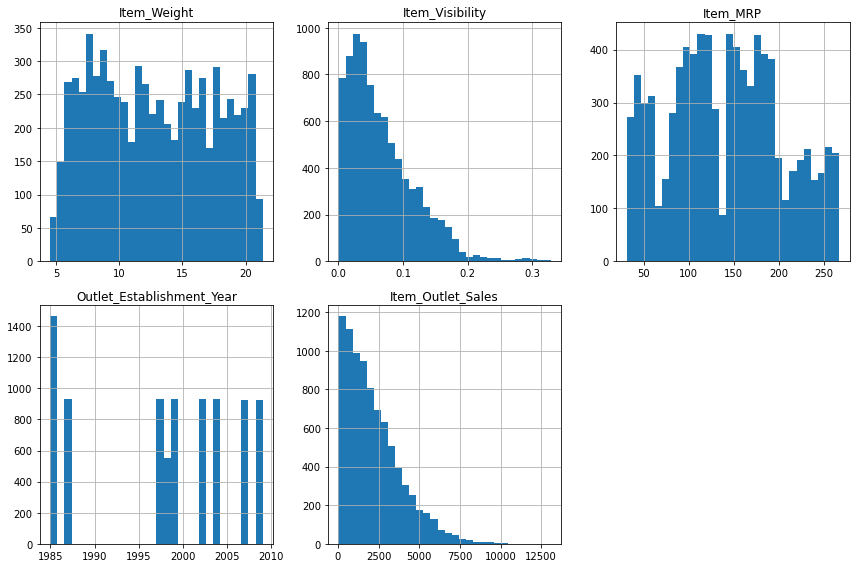

In [646]:
# Histograms for numerical variables
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
train_df[num_cols].hist(bins=30, figsize=(12, 8), layout=(len(num_cols)//3+1, 3))
plt.tight_layout()
plt.show()

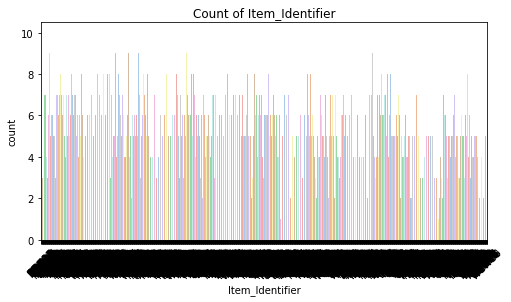

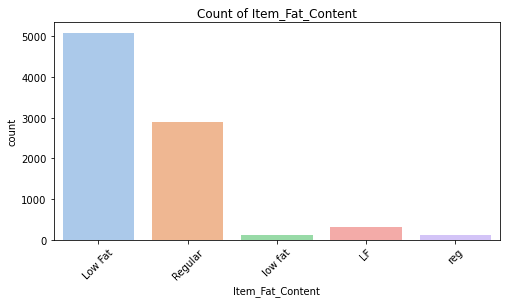

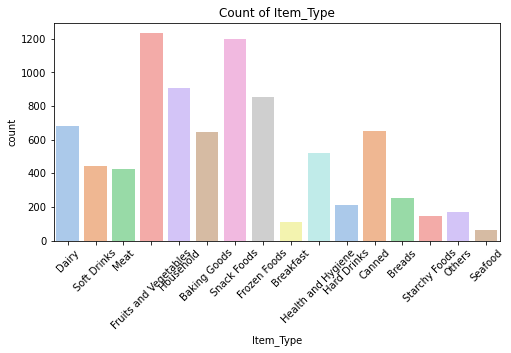

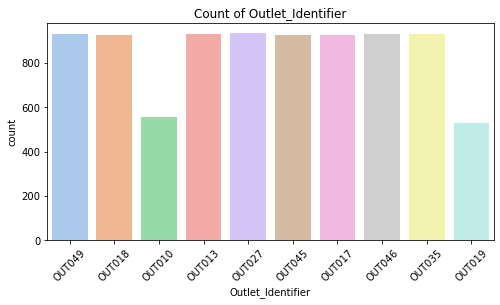

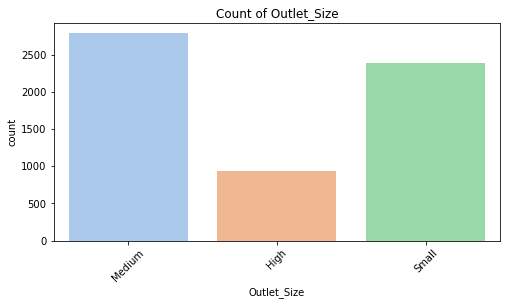

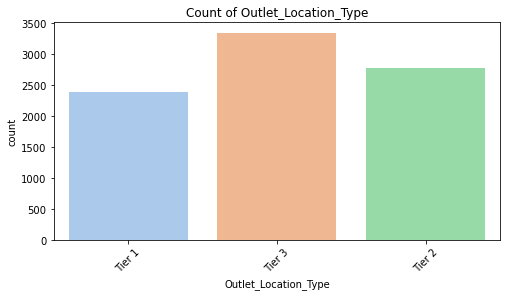

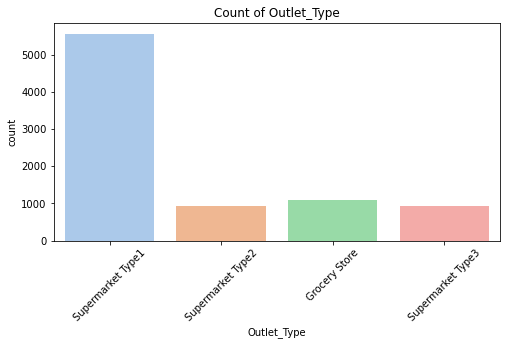

In [647]:
# Count plots for categorical variables
cat_cols = train_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=train_df[col], palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.show()

# Multivariate Analysis

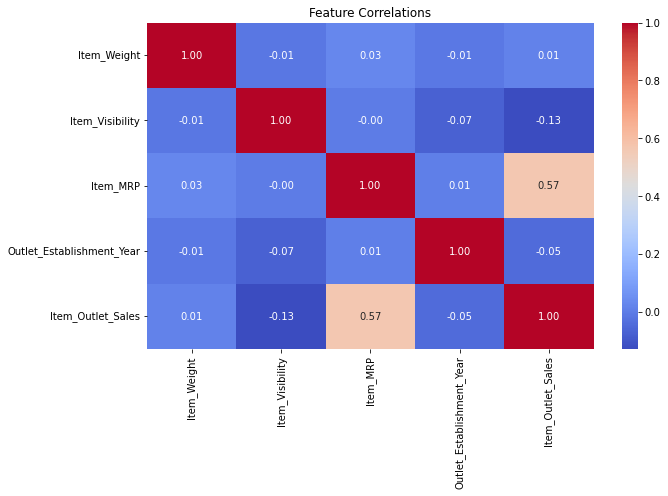

In [649]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

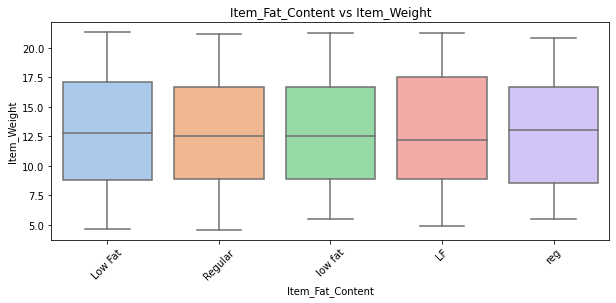

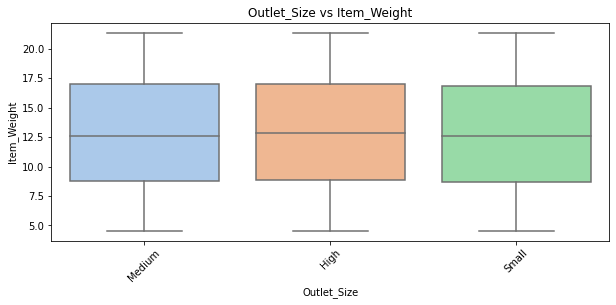

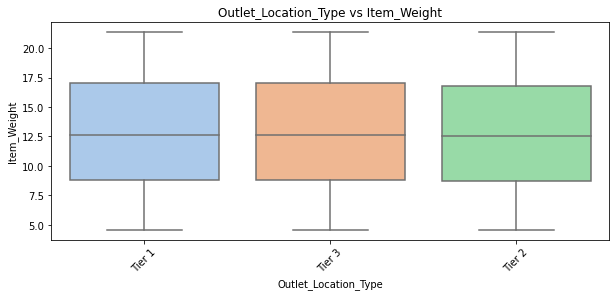

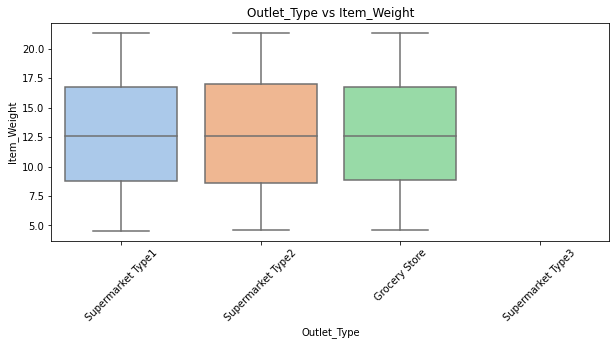

In [652]:
# Boxplots for categorical vs numerical
for col in cat_cols:
    if train_df[col].nunique() < 10:  # Avoid too many categories
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=train_df[col], y=train_df[num_cols[0]], data=train_df, palette='pastel')
        plt.xticks(rotation=45)
        plt.title(f'{col} vs {num_cols[0]}')
        plt.show()

# Missing Values

In [418]:
# Checking for missing values
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [419]:
# Summary statistics
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

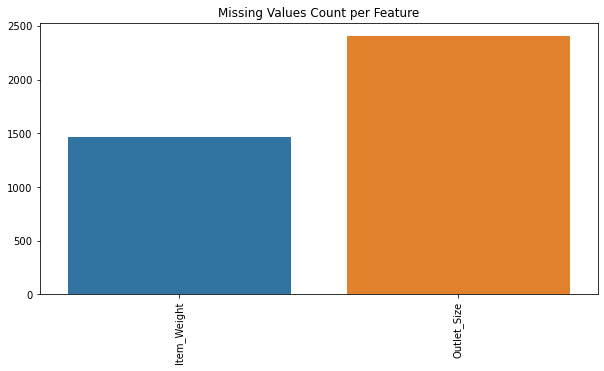

Missing Values Summary:
Item_Weight     976
Outlet_Size    1606
dtype: int64


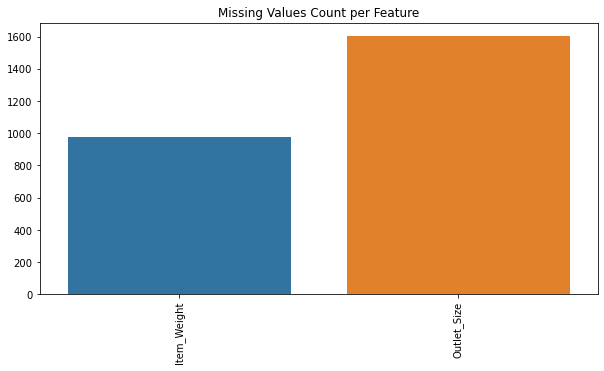

In [420]:
# Exploring missing values in train and test datasets
# This function calculates the number of missing values in each feature and visualizes the missing data distribution.
# helps in identifying which features need imputation or further investigation.

def explore_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print("Missing Values Summary:")
    print(missing_values)
    
    # Plot missing values
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.xticks(rotation=90)
    plt.title("Missing Values Count per Feature")
    plt.show()

train_df.info()
test_df.info()
explore_missing_values(train_df)
explore_missing_values(test_df)

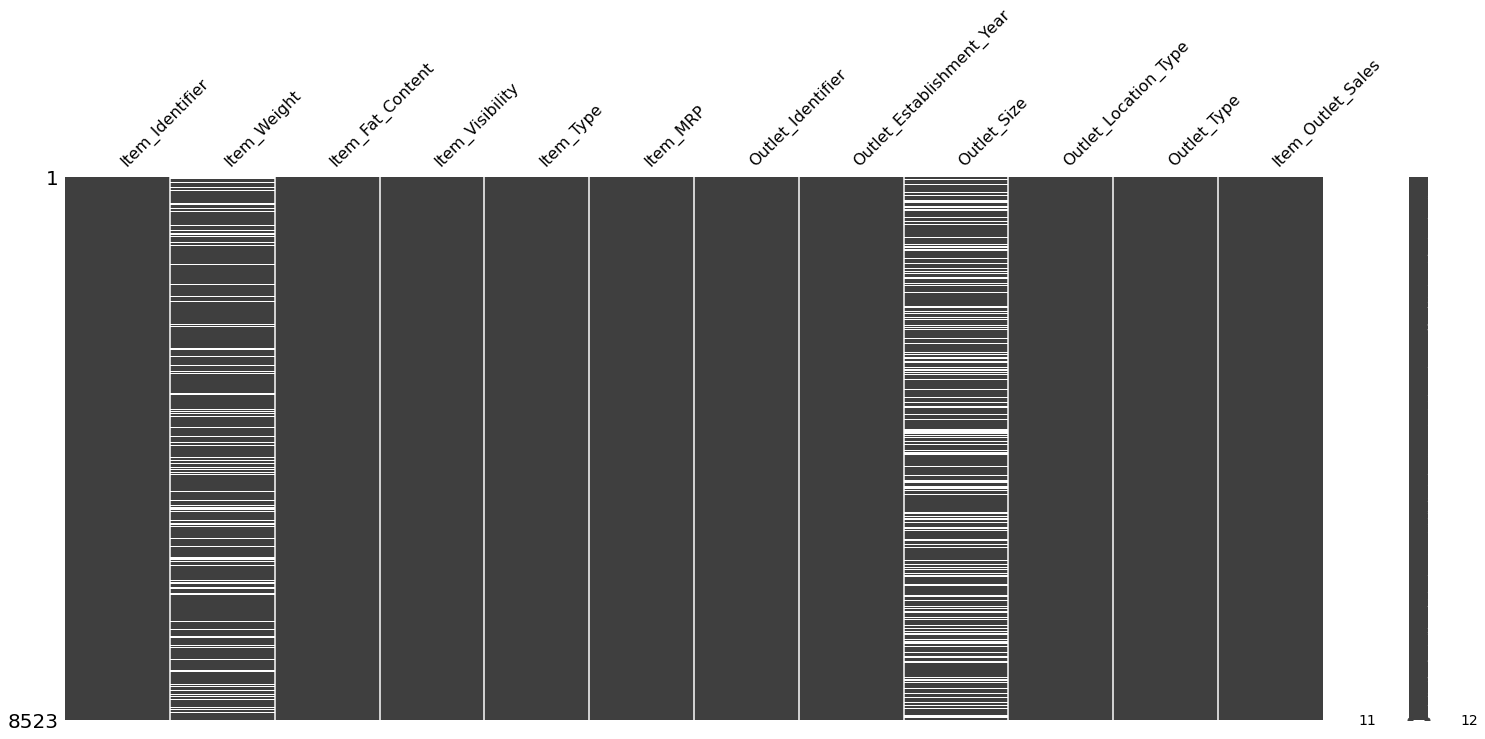

In [421]:
#checking if the missing values are random or patterned
import missingno as msno
msno.matrix(train_df)
plt.show()


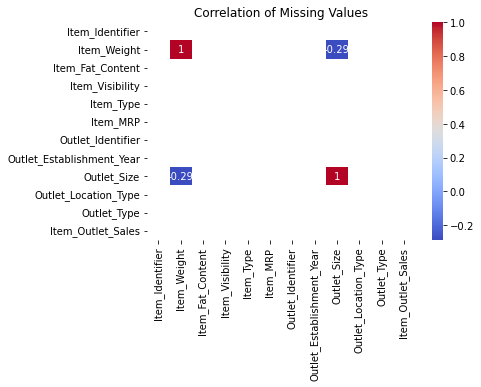

In [422]:
# Check correlations of missing values
missing_corr = train_df.isnull().corr()
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Missing Values")
plt.show()


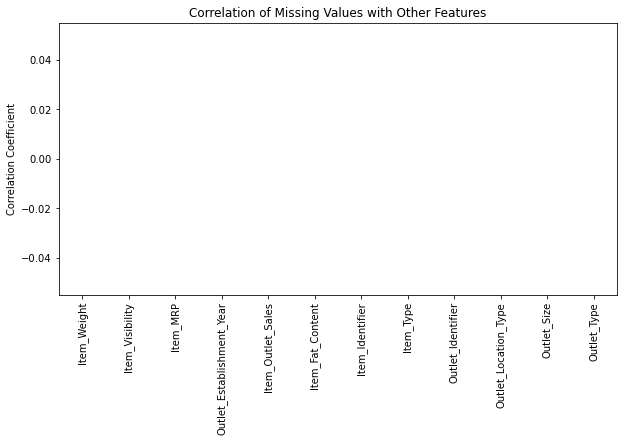

Item_Weight                 NaN
Item_Visibility             NaN
Item_MRP                    NaN
Outlet_Establishment_Year   NaN
Item_Outlet_Sales           NaN
Item_Fat_Content            NaN
Item_Identifier             NaN
Item_Type                   NaN
Outlet_Identifier           NaN
Outlet_Location_Type        NaN
Outlet_Size                 NaN
Outlet_Type                 NaN
dtype: float64


In [423]:
# Function to compute correlation between missing values and other features
def missing_value_correlation(df):
    missing_df = df.isnull().astype(int)  # Convert missing values to 1, present values to 0
    corr_matrix = missing_df.corrwith(df.dropna().select_dtypes(include=[np.number]))  # Correlation with numeric features
    
    # Plot the correlation results
    plt.figure(figsize=(10, 5))
    corr_matrix.sort_values().plot(kind="bar", color="skyblue")
    plt.title("Correlation of Missing Values with Other Features")
    plt.ylabel("Correlation Coefficient")
    plt.xticks(rotation=90)
    plt.show()

    return corr_matrix

# Run the function on training data
missing_corr_results = missing_value_correlation(train_df)
print(missing_corr_results)


In [424]:
# Interpretation: The correlations are close to zero, meaning missing values are likely random.
# Hence, using median for numerical data and mode for categorical data is a reasonable approach.

## Analyzing Missing item_weight values

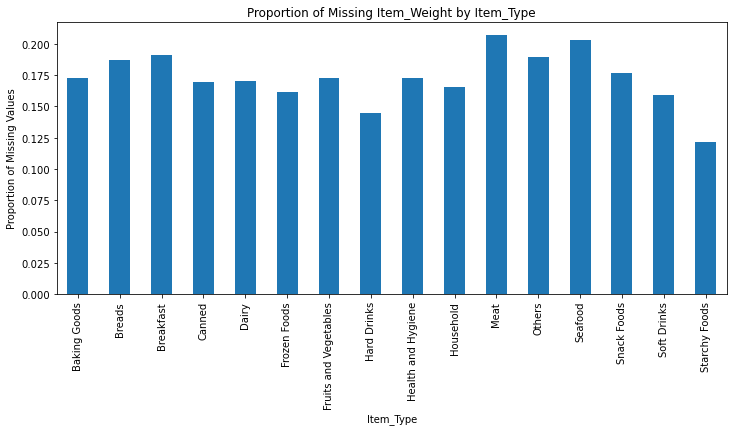

In [425]:
# Check if missing Item_Weight values are related to Item_Type
plt.figure(figsize=(12, 5))
train_df.groupby("Item_Type")["Item_Weight"].apply(lambda x: x.isnull().mean()).plot(kind="bar")
plt.title("Proportion of Missing Item_Weight by Item_Type")
plt.ylabel("Proportion of Missing Values")
plt.xticks(rotation=90)
plt.show()


In [426]:
# Find median Item_Weight grouped by Item_Identifier and Item_MRP
train_df.groupby(["Item_Identifier", "Item_MRP"])["Item_Weight"].median()


Item_Identifier  Item_MRP
DRA12            140.3154    11.60
                 141.6154    11.60
                 141.9154    11.60
                 142.0154    11.60
                 142.3154    11.60
                             ...  
NCZ54            161.5552    14.65
                 161.9552    14.65
                 162.4552    14.65
                 163.4552    14.65
                 164.0552      NaN
Name: Item_Weight, Length: 8019, dtype: float64

In [427]:
# Define a function to create MRP bins dynamically based on data distribution
def create_mrp_bins(df):
    def bin_transform(x):
        bins = np.histogram_bin_edges(x, bins='auto')  # Determine bins dynamically
        return pd.cut(x, bins=bins, labels=False, include_lowest=True)

    df["MRP_Bin"] = df.groupby("Item_Identifier")["Item_MRP"].transform(bin_transform)
    return df

# Apply binning
train_df = create_mrp_bins(train_df)


In [428]:

# Display first 5 rows of each Item_Identifier with MRP bins
train_df.groupby("Item_Identifier").head(5)[["Item_Identifier", "Item_MRP", "MRP_Bin"]]


,Item_Identifier,Item_MRP,MRP_Bin
0,FDA15,249.8092,2
1,DRC01,48.2692,0
2,FDN15,141.6180,3
3,FDX07,182.0950,1
4,NCD19,53.8614,0
...,...,...,...
8513,FDH31,99.9042,3
8515,FDH24,157.5288,3
8516,NCJ19,58.7588,3
8517,FDF53,178.8318,0


In [429]:
train_df.sort_values(by=["Item_Identifier", "Item_MRP"]).groupby("Item_Identifier").head(5)[["Item_Identifier", "Item_MRP", "MRP_Bin"]]


,Item_Identifier,Item_MRP,MRP_Bin
118,DRA12,140.3154,0
1197,DRA12,141.6154,2
1693,DRA12,141.9154,2
7467,DRA12,142.0154,3
1245,DRA12,142.3154,3
...,...,...,...
7166,NCZ54,160.9552,0
7926,NCZ54,161.3552,0
214,NCZ54,161.5552,0
2839,NCZ54,161.9552,1


In [430]:
# Trying bins based on clustering
from sklearn.cluster import DBSCAN
import numpy as np

def create_mrp_bins(df, eps=5, min_samples=2):
    """Cluster MRP values into bins using DBSCAN per Item_Identifier."""
    
    def bin_transform(sub_df):
        mrp_values = sub_df[["Item_MRP"]].values.reshape(-1, 1)
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(mrp_values)
        sub_df["MRP_Bin"] = clustering.labels_
        return sub_df

    # Apply DBSCAN binning within each Item_Identifier group
    df = df.groupby("Item_Identifier", group_keys=False).apply(bin_transform)
    
    return df

# Apply binning
train_df = create_mrp_bins(train_df)


In [431]:
train_df[train_df["Item_Identifier"] == "FDW13"][["Item_Identifier", "Item_MRP","Item_Weight", "MRP_Bin"]].sort_values(by="Item_MRP")

,Item_Identifier,Item_MRP,Item_Weight,MRP_Bin
6499,FDW13,50.3324,8.5,0
7029,FDW13,50.5324,8.5,0
8025,FDW13,50.5324,NaN,0
256,FDW13,51.1324,8.5,0
1141,FDW13,51.1324,8.5,0
2190,FDW13,51.3324,8.5,0
6587,FDW13,51.3324,8.5,0
3978,FDW13,51.5324,8.5,0
8032,FDW13,52.5324,8.5,0
3928,FDW13,52.7324,NaN,0


In [432]:
train_df[train_df["Item_Weight"].isna()][["Item_Identifier", "Item_MRP", "MRP_Bin"]].sort_values(by=["Item_Identifier", "Item_MRP"])


,Item_Identifier,Item_MRP,MRP_Bin
2879,DRA24,163.2868,0
4416,DRA24,165.7868,0
6179,DRA59,186.2924,0
6057,DRA59,186.6924,0
3733,DRB01,190.0530,0
...,...,...,...
3750,NCZ18,252.7698,0
4523,NCZ30,121.9098,0
2084,NCZ53,190.4214,0
7166,NCZ54,160.9552,0


In [433]:
#finding items with more than 1 bin
bins_per_item = train_df[train_df["Item_Weight"].isna()].groupby("Item_Identifier")["MRP_Bin"].nunique()
multiple_bins = bins_per_item[bins_per_item > 1]

# Display details of those items
train_df[train_df["Item_Identifier"].isin(multiple_bins.index) & train_df["Item_Weight"].isna()][["Item_Identifier", "Item_MRP", "MRP_Bin"]].sort_values(by=["Item_Identifier", "Item_MRP"])


,Item_Identifier,Item_MRP,MRP_Bin


In [434]:
#finding items with more than 1 bin
train_df[
    (train_df["Item_Identifier"].isin(train_df[train_df["Item_Weight"].isna()]["Item_Identifier"])) &
    (train_df["MRP_Bin"] > 0)
].sort_values(by=["Item_Identifier", "Item_Weight"])


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRP_Bin


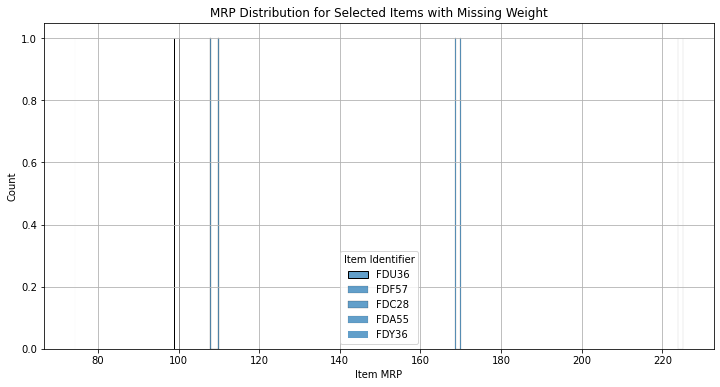

In [435]:
# Plotting MRP Distribution for Selected Items with Missing Weight

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique Item_Identifiers with missing Item_Weight
missing_weight_items = train_df[train_df["Item_Weight"].isna()]

# Find items that have more than one unique MRP value
valid_items = missing_weight_items.groupby("Item_Identifier")["Item_MRP"].nunique()
valid_items = valid_items[valid_items > 1].index  # Keep only those with multiple MRPs

# Select up to 5 valid items for plotting
selected_items = np.random.choice(valid_items, size=min(5, len(valid_items)), replace=False)

# Plot histogram per selected item
plt.figure(figsize=(12, 6))

for item in selected_items:
    item_data = missing_weight_items[missing_weight_items["Item_Identifier"] == item]["Item_MRP"]
    sns.histplot(item_data, kde=False, bins=10, label=item, alpha=0.7)

plt.title("MRP Distribution for Selected Items with Missing Weight")
plt.xlabel("Item MRP")
plt.ylabel("Count")
plt.legend(title="Item Identifier")
plt.grid(True)

plt.show()


In [436]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRP_Bin
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0


In [437]:
# After analyzing the distributions, we found that MRP values didn't vary much for each item => weight was constant
# Hence we did not need mrp binning to decide which weight to use - we can simply use the median weight for that item identifer

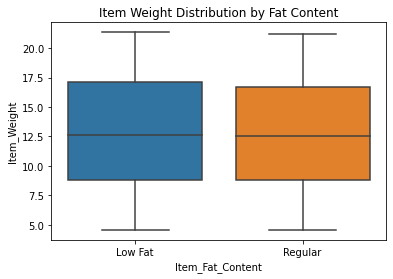

Item_Fat_Content
Low Fat    12.937387
Regular    12.711654
Name: Item_Weight, dtype: float64
ANOVA Test p-value: 0.05088451503405356


In [438]:
# Checking the correlation between Item_Weight and Item_Fat_Content

# Standardize Item_Fat_Content values
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

# Check correlation via visualization
sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=train_df)
plt.title('Item Weight Distribution by Fat Content')
plt.show()

# Compute mean weight per category
print(train_df.groupby('Item_Fat_Content')['Item_Weight'].mean())

# Perform statistical test (ANOVA) to check significance
from scipy.stats import f_oneway
low_fat_weights = train_df[train_df['Item_Fat_Content'] == 'Low Fat']['Item_Weight'].dropna()
regular_weights = train_df[train_df['Item_Fat_Content'] == 'Regular']['Item_Weight'].dropna()

anova_result = f_oneway(low_fat_weights, regular_weights)
print(f"ANOVA Test p-value: {anova_result.pvalue}")


In [439]:
# based on the ANOVA test and box plot analysis, Item Fat Content should not be used to fill missing values for Item Weight because the correlation is weak. Instead, using the median Item Weight per Item Identifier is a better approach.

## Updating the missing values in item weight

In [440]:
# Filling missing Item_Weight using median per Item_Identifier
train_df['Item_Weight'] = train_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

In [441]:
train_df[train_df["Item_Weight"].isnull()]["Item_Identifier"]

927     FDN52
1922    FDK57
4187    FDE52
5022    FDQ60
Name: Item_Identifier, dtype: object

In [442]:
# 4 item identifiers with missing weight do not have any other records - diving deeper
# 927     FDN52
# 1922    FDK57
# 4187    FDE52
# 5022    FDQ60
# Name: Item_Identifier, dtype: object

In [443]:
#Looks like Item_Identifier follows a pattern (e.g., FD, DR, NC) - diving deeper here

In [444]:
# Extract main category of Item_Identifier
train_df['Item_Base'] = train_df['Item_Identifier'].str[:-2]

In [445]:
train_df[train_df["Item_Base"].isin(["FDN", "FDK", "FDE", "FDQ"])].groupby("Item_Base")["Item_Weight"].median()

Item_Base
FDE    12.10
FDK    10.80
FDN    14.10
FDQ    12.65
Name: Item_Weight, dtype: float64

In [446]:
train_df[train_df["Item_Base"].isin(["FDN"])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRP_Bin,Item_Base
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,FDN
20,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860,0,FDN
77,FDN48,13.350,Low Fat,0.113720,Baking Goods,89.9804,OUT019,1985,Small,Tier 1,Grocery Store,643.1628,0,FDN
81,FDN04,11.800,Regular,0.014087,Frozen Foods,180.3344,OUT046,1997,Small,Tier 1,Supermarket Type1,1427.4752,0,FDN
88,FDN33,6.305,Regular,0.123116,Snack Foods,95.6436,OUT046,1997,Small,Tier 1,Supermarket Type1,661.8052,0,FDN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8439,FDN08,7.720,Regular,0.000000,Fruits and Vegetables,117.7466,OUT018,2009,Medium,Tier 3,Supermarket Type2,1296.3126,0,FDN
8460,FDN39,19.350,Regular,0.065508,Meat,168.9816,OUT035,2004,Small,Tier 2,Supermarket Type1,2852.2872,0,FDN
8507,FDN28,5.880,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950,0,FDN
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504,0,FDN


In [447]:
#item Base is not working
train_df[train_df["Item_Identifier"].isin(["FDN52", "FDK57", "FDE52", "FDQ60"])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRP_Bin,Item_Base
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,-1,FDN
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,-1,FDK
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,-1,FDE
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,-1,FDQ


In [448]:
#TRying item_type
train_df[train_df["Item_Type"].isin(["Frozen Foods", "Snack Foods", "Dairy", "Baking Goods"])].groupby("Item_Type")["Item_Weight"].median()

Item_Type
Baking Goods    11.65
Dairy           13.35
Frozen Foods    12.85
Snack Foods     13.15
Name: Item_Weight, dtype: float64

In [449]:
train_df[train_df["Item_Base"].isin(["FDN", "FDK", "FDE", "FDQ"])] \
    .groupby(['Item_Type', 'Item_Base', 'Item_Identifier'])["Item_Weight"].value_counts()

Item_Type      Item_Base  Item_Identifier  Item_Weight
Baking Goods   FDE        FDE24            14.850         6
                          FDE36            5.260          6
               FDK        FDK24            9.195          6
                          FDK36            7.090          5
                          FDK48            7.445          5
                                                         ..
Starchy Foods  FDE        FDE11            17.700         8
                          FDE23            17.600         5
                          FDE35            7.060          5
                          FDE47            14.150         4
                          FDE59            12.150         6
Name: Item_Weight, Length: 155, dtype: int64

In [450]:
# Filtering dataset for specific Item_Base and Item_Type combinations
specific_combinations = train_df[
    ((train_df['Item_Base'] == 'FDE') & (train_df['Item_Type'] == 'Dairy')) |
    ((train_df['Item_Base'] == 'FDN') & (train_df['Item_Type'] == 'Frozen Foods')) |
    ((train_df['Item_Base'] == 'FDK') & (train_df['Item_Type'] == 'Snack Foods')) |
    ((train_df['Item_Base'] == 'FDQ') & (train_df['Item_Type'] == 'Baking Goods'))
]

# Grouping and analyzing the data 
print(specific_combinations[specific_combinations["Item_Base"] == 'FDQ'].groupby(['Item_Type', 'Item_Base', 'Item_Identifier', 'MRP_Bin'])['Item_Weight'].median())

#specific_combinations[specific_combinations["Item_Base"] == 'FDQ'].sort_values(['Item_Type', 'Item_Base', 'Item_Identifier'])

Item_Type     Item_Base  Item_Identifier  MRP_Bin
Baking Goods  FDQ        FDQ12             0         12.650
                         FDQ24             0         15.700
                         FDQ36             0          7.855
                         FDQ48             0         14.300
                         FDQ60            -1            NaN
Name: Item_Weight, dtype: float64


In [451]:
train_df[train_df["Item_Type"].isin(["Frozen Foods", "FDK57", "FDE52", "FDQ60"])].sort_values("Item_Identifier")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRP_Bin,Item_Base
2622,FDA04,11.3,Regular,0.066717,Frozen Foods,260.8962,OUT035,2004,Small,Tier 2,Supermarket Type1,4920.9278,0,FDA
1409,FDA04,11.3,Regular,0.066407,Frozen Foods,259.7962,OUT027,1985,Medium,Tier 3,Supermarket Type3,5697.9164,0,FDA
6132,FDA04,11.3,Regular,0.067002,Frozen Foods,259.1962,OUT018,2009,Medium,Tier 3,Supermarket Type2,5438.9202,0,FDA
1901,FDA04,11.3,Regular,0.067107,Frozen Foods,258.1962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354,0,FDA
5389,FDA04,11.3,Regular,0.066865,Frozen Foods,260.1962,OUT045,2002,NaN,Tier 2,Supermarket Type1,2848.9582,0,FDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,FDZ52,19.2,Low Fat,0.099590,Frozen Foods,109.1886,OUT027,1985,Medium,Tier 3,Supermarket Type3,4225.1668,0,FDZ
4142,FDZ52,19.2,Low Fat,0.100482,Frozen Foods,111.8886,OUT018,2009,Medium,Tier 3,Supermarket Type2,1667.8290,0,FDZ
603,FDZ52,19.2,Low Fat,0.100230,Frozen Foods,112.9886,OUT049,1999,Medium,Tier 1,Supermarket Type1,1667.8290,0,FDZ
7696,FDZ52,19.2,Low Fat,0.100075,Frozen Foods,110.2886,OUT046,1997,Small,Tier 1,Supermarket Type1,778.3202,0,FDZ


In [452]:
# Filtering specific combinations
specific_combinations = train_df[
    ((train_df['Item_Base'] == 'FDE') & (train_df['Item_Type'] == 'Dairy')) |
    ((train_df['Item_Base'] == 'FDN') & (train_df['Item_Type'] == 'Frozen Foods')) |
    ((train_df['Item_Base'] == 'FDK') & (train_df['Item_Type'] == 'Snack Foods')) |
    ((train_df['Item_Base'] == 'FDQ') & (train_df['Item_Type'] == 'Baking Goods'))
]

# Grouping and analyzing the data
result = specific_combinations.groupby(['Item_Type', 'Item_Base', 'Item_Identifier', 'MRP_Bin'])[['Item_MRP', 'Item_Weight']].median()
result['MRP_per_Weight'] = result['Item_MRP'] / result['Item_Weight']

result.groupby(['Item_Type', 'Item_Base', 'MRP_Bin'])[['Item_MRP', 'Item_Weight', 'MRP_per_Weight']].median()


Item_MRP  Item_Weight  MRP_per_Weight
Item_Type    Item_Base MRP_Bin                                       
Baking Goods FDQ       -1       121.2098          NaN             NaN
                        0       164.5618       13.475       11.396887
Dairy        FDE       -1        88.9514          NaN             NaN
                        0        62.9194        7.890        7.376979
Frozen Foods FDN       -1        86.9198          NaN             NaN
                        0       128.8994        8.840       16.221395
Snack Foods  FDK       -1       120.0440          NaN             NaN
                        0       222.5351       10.575       20.013882

In [453]:
# Bins are not as per the requirement
train_df = train_df.drop(columns=["MRP_Bin"], errors="ignore")

## Updating the 4 missing weights 

In [454]:
#Generic approach below is much simpler hence comemnting this one out 


'''
# Advanced Imputation for the 4 Missing Item_Weights
# This method estimates missing weights by using the median MRP_per_Weight calculated from known 
# values within the same (Item_Type, Item_Base) group.

# Compute MRP_per_Weight for non-null Item_Weights
train_df['MRP_per_Weight'] = train_df['Item_MRP'] / train_df['Item_Weight']

# Calculate the median MRP_per_Weight for each (Item_Type, Item_Base) combi
mrp_weight_median = train_df.groupby(['Item_Type', 'Item_Base'])['MRP_per_Weight'].median()

# Identify the 4 specific items with missing Item_Weight
specific_missing_items = train_df[
    (train_df['Item_Weight'].isna()) &
    (
        ((train_df['Item_Base'] == 'FDE') & (train_df['Item_Type'] == 'Dairy')) |
        ((train_df['Item_Base'] == 'FDN') & (train_df['Item_Type'] == 'Frozen Foods')) |
        ((train_df['Item_Base'] == 'FDK') & (train_df['Item_Type'] == 'Snack Foods')) |
        ((train_df['Item_Base'] == 'FDQ') & (train_df['Item_Type'] == 'Baking Goods'))
    )
]

# Fill missing weights using  MRP_per_Weight median
train_df.loc[specific_missing_items.index, 'Item_Weight'] = specific_missing_items.apply(
    lambda row: row['Item_MRP'] / mrp_weight_median.get((row['Item_Type'], row['Item_Base']), 1), axis=1
)

# Drop MRP_per_Weight column
train_df.drop(columns=['MRP_per_Weight'], inplace=True)

# Verify updated values
print(train_df.loc[specific_missing_items.index, ['Item_Identifier', 'Item_Type', 'Item_Base', 'Item_Weight']])
'''

"\n# Advanced Imputation for the 4 Missing Item_Weights\n# This method estimates missing weights by using the median MRP_per_Weight calculated from known \n# values within the same (Item_Type, Item_Base) group.\n\n# Compute MRP_per_Weight for non-null Item_Weights\ntrain_df['MRP_per_Weight'] = train_df['Item_MRP'] / train_df['Item_Weight']\n\n# Calculate the median MRP_per_Weight for each (Item_Type, Item_Base) combi\nmrp_weight_median = train_df.groupby(['Item_Type', 'Item_Base'])['MRP_per_Weight'].median()\n\n# Identify the 4 specific items with missing Item_Weight\nspecific_missing_items = train_df[\n    (train_df['Item_Weight'].isna()) &\n    (\n        ((train_df['Item_Base'] == 'FDE') & (train_df['Item_Type'] == 'Dairy')) |\n        ((train_df['Item_Base'] == 'FDN') & (train_df['Item_Type'] == 'Frozen Foods')) |\n        ((train_df['Item_Base'] == 'FDK') & (train_df['Item_Type'] == 'Snack Foods')) |\n        ((train_df['Item_Base'] == 'FDQ') & (train_df['Item_Type'] == 'Baking Go

In [455]:
# Trying generic approach 

In [456]:
# Extract the first two characters from Item_Base to create a new grouping key
train_df['Item_Group'] = train_df['Item_Base'].str[:2]

# Compute MRP_per_Weight for non-null Item_Weights
train_df['MRP_per_Weight'] = train_df['Item_MRP'] / train_df['Item_Weight']

# Calculate the median MRP_per_Weight for each Item_Group
mrp_weight_median = train_df.groupby('Item_Group')['MRP_per_Weight'].median()

# Identify missing Item_Weight rows
missing_weight_mask = train_df['Item_Weight'].isna()

# Estimate missing weights using the median MRP_per_Weight from the same Item_Group
train_df.loc[missing_weight_mask, 'Item_Weight'] = train_df.loc[missing_weight_mask].apply(
    lambda row: row['Item_MRP'] / mrp_weight_median.get(row['Item_Group'], np.nan), axis=1
)

# Drop the temporary columns used for calculations
train_df.drop(columns=['MRP_per_Weight', 'Item_Group'], inplace=True)


In [457]:
train_df['Item_Weight'].isna().sum()

0

## Analyzing Missing Outlet_Size values

In [458]:
train_df["Outlet_Size"].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [459]:
train_df["Outlet_Identifier"].nunique()


10

In [460]:
# This will check if each Outlet_Identifier always has the same Outlet_Size.
train_df.groupby("Outlet_Identifier")["Outlet_Size"].unique()


Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

In [461]:
train_df[train_df["Outlet_Size"].isnull()]["Outlet_Type"].value_counts()


Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [462]:
train_df[train_df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Base
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FDX
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,FDH
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,FDU
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,NCD
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,FDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688,NCH
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646,FDW
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804,FDG
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232,FDA


In [463]:
train_df.groupby(["Outlet_Type", "Outlet_Size"])["Outlet_Identifier"].nunique()


Outlet_Type        Outlet_Size
Grocery Store      Small          1
Supermarket Type1  High           1
                   Medium         1
                   Small          2
Supermarket Type2  Medium         1
Supermarket Type3  Medium         1
Name: Outlet_Identifier, dtype: int64

In [464]:
#Observations
#Grocery Store → Small (1 occurrence)
#Supermarket Type1 has High (1), Medium (1), and Small (2) → This means Supermarket Type1 does not have a fixed size.
#Supermarket Type2 → Medium (1) → Consistent.
#Supermarket Type3 → Medium (1) → Consistent.
#Since Supermarket Type2 and Type3 are always Medium, we can safely assume that missing values for these types should be Medium.

#For Supermarket Type1, since multiple sizes exist, we might need more logic.

In [465]:
train_df.groupby(["Outlet_Location_Type", "Outlet_Type"])["Outlet_Size"].unique()

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store                [Small]
                      Supermarket Type1    [Medium, Small]
Tier 2                Supermarket Type1       [nan, Small]
Tier 3                Grocery Store                  [nan]
                      Supermarket Type1             [High]
                      Supermarket Type2           [Medium]
                      Supermarket Type3           [Medium]
Name: Outlet_Size, dtype: object

In [466]:
#Observations from the Data:
#Tier 1

#Grocery Store → Always Small 
#Supermarket Type1 → Can be Medium or Small 

#Tier 2

#Supermarket Type1 → Has both NaN and Small (Could be inferred as Small)

#Tier 3

#Grocery Store → Only has NaN (but we have established above that its always Small)
#Supermarket Type1 → Always High 
#Supermarket Type2 & Type3 → Always Medium 

In [467]:
# Count the number of records where Outlet_Location_Type is 'Tier 1' and Outlet_Type is 'Supermarket Type1'
tier1_supermarket1_count = train_df[
    (train_df["Outlet_Location_Type"] == "Tier 1") & 
    (train_df["Outlet_Type"] == "Supermarket Type1")
].shape[0]

print(f"Number of items in Tier 1 and Supermarket Type1: {tier1_supermarket1_count}")


Number of items in Tier 1 and Supermarket Type1: 1860


In [468]:
# Get unique Outlet_Identifiers and their corresponding attributes
unique_outlets = train_df[["Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type", "Outlet_Size"]].drop_duplicates()

# Display the result
print(unique_outlets)


   Outlet_Identifier Outlet_Location_Type        Outlet_Type Outlet_Size
0             OUT049               Tier 1  Supermarket Type1      Medium
1             OUT018               Tier 3  Supermarket Type2      Medium
3             OUT010               Tier 3      Grocery Store         NaN
4             OUT013               Tier 3  Supermarket Type1        High
7             OUT027               Tier 3  Supermarket Type3      Medium
8             OUT045               Tier 2  Supermarket Type1         NaN
9             OUT017               Tier 2  Supermarket Type1         NaN
11            OUT046               Tier 1  Supermarket Type1       Small
19            OUT035               Tier 2  Supermarket Type1       Small
23            OUT019               Tier 1      Grocery Store       Small


In [469]:
# OUT010 (Tier 3, Grocery Store) -> Small
# OUT045 (Tier 2, Supermarket Type1) -> Small
# OUT017 (Tier 2, Supermarket Type1) -> Small

## Updating Missing Outlet_Size Values

In [470]:
# Identifying unique Outlet_Identifiers with missing Outlet_Size
missing_size_outlets = train_df[train_df['Outlet_Size'].isna()]['Outlet_Identifier'].unique()

# Map missing Outlet_Size values based on observed trends
outlet_size_mapping = {
    'OUT010': 'Small',  # Grocery Store → Always Small
    'OUT045': 'Small',  # Tier 2, Supermarket Type1 → Small (based on other entries)
    'OUT017': 'Small'   # Tier 2, Supermarket Type1 → Small (based on other entries)
}

# Apply mapping to fill missing Outlet_Size values
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(train_df['Outlet_Identifier'].map(outlet_size_mapping))

In [471]:
# Re-Checking for missing values
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Base                    0
dtype: int64

In [480]:
# Summary statistics to check for outliers
train_df[['Item_Weight', 'Item_Visibility', 'Item_MRP']].describe()

,Item_Weight,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,12.873844,0.070226,140.992782
std,4.645690,0.049977,62.275067
min,4.555000,0.003575,31.290000
25%,8.785000,0.031276,93.826500
50%,12.600000,0.057654,143.012800
75%,16.850000,0.097864,185.643700
max,21.350000,0.328391,266.888400


In [481]:
# Checking for Outliers: 

## Item_Weight: IQR=Q3−Q1=16.85−8.79 = 8.06 
# => Q1−1.5×IQR = 8.79−1.5×8.06 = −3.3 (min = 4.56) => No lower outliers 
# => Q3+1.5×IQR = 16.85+1.5×8.06 = 28.99 (max = 21.35) => No upper outliers 

## Item_Visibility: IQR=0.0979−0.0313 = 0.0666
# => Q1−1.5×IQR=0.0313−1.5×0.0666 = −0.068 (min = 0.00357) => No lower outliers 
# => Q3+1.5×IQR=0.0979+1.5×0.0666 = 0.1978 => Max (0.328) is an outlier
# Potential outliers in Item_Visibility (values > 0.1978).

## Item_MRP: IQR=185.64−93.83 = 91.81
# => 93.83−1.5×91.81 = −44.88 => No lower outliers
# => 185.64+1.5×91.81 = 324.35 (max = 266.88)=> No upper outliers 

In [482]:
import pandas as pd

# Compute IQR for Item_Visibility
Q1 = train_df['Item_Visibility'].quantile(0.25)
Q3 = train_df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold (1.5*IQR)
upper_threshold = Q3 + 1.5 * IQR

# Filter outliers
visibility_outliers = train_df[train_df['Item_Visibility'] > upper_threshold]

# Display outlier information
print("Outliers in Item_Visibility:")
print(visibility_outliers[['Item_Identifier', 'Item_Visibility', 'Item_Type']])


Outliers in Item_Visibility:
     Item_Identifier  Item_Visibility              Item_Type
49             FDS02         0.255395                  Dairy
83             NCL18         0.293418              Household
108            DRE60         0.278974            Soft Drinks
174            FDI32         0.291865  Fruits and Vegetables
334            FDC41         0.204700           Frozen Foods
...              ...              ...                    ...
8292           FDF56         0.209163  Fruits and Vegetables
8345           FDY28         0.266397           Frozen Foods
8371           DRA59         0.214125            Soft Drinks
8432           FDI16         0.227261           Frozen Foods
8509           FDG45         0.214306  Fruits and Vegetables

[141 rows x 3 columns]


In [483]:
# Count outliers by Item_Type
outlier_counts = visibility_outliers['Item_Type'].value_counts()

# Display results
print("Outlier Distribution by Item Type:")
print(outlier_counts)


Outlier Distribution by Item Type:
Fruits and Vegetables    24
Snack Foods              19
Baking Goods             16
Dairy                    12
Household                12
Frozen Foods             11
Canned                   10
Meat                      7
Soft Drinks               6
Starchy Foods             5
Health and Hygiene        4
Breakfast                 4
Hard Drinks               3
Breads                    3
Seafood                   3
Others                    2
Name: Item_Type, dtype: int64


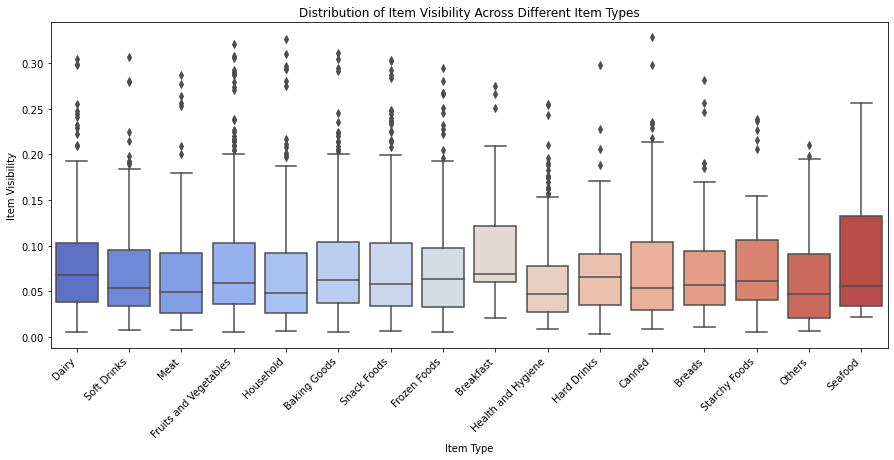

In [484]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 6))

# Create a boxplot
sns.boxplot(x=train_df['Item_Type'], y=train_df['Item_Visibility'], palette='coolwarm')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.xlabel("Item Type")
plt.ylabel("Item Visibility")
plt.title("Distribution of Item Visibility Across Different Item Types")

# Show the plot
plt.show()


In [485]:
from scipy import stats

train_df['Z_Score'] = stats.zscore(train_df['Item_Visibility'])
outliers_z = train_df[abs(train_df['Z_Score']) > 3]
print("Number of outliers detected using Z-Score:", len(outliers_z))

Number of outliers detected using Z-Score: 96


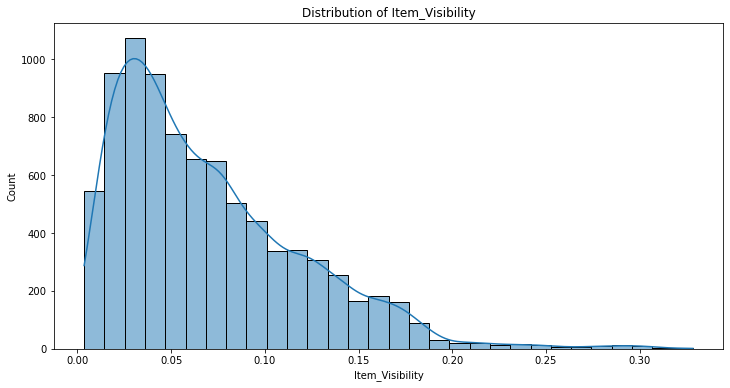

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(train_df['Item_Visibility'], bins=30, kde=True)
plt.title("Distribution of Item_Visibility")
plt.show()


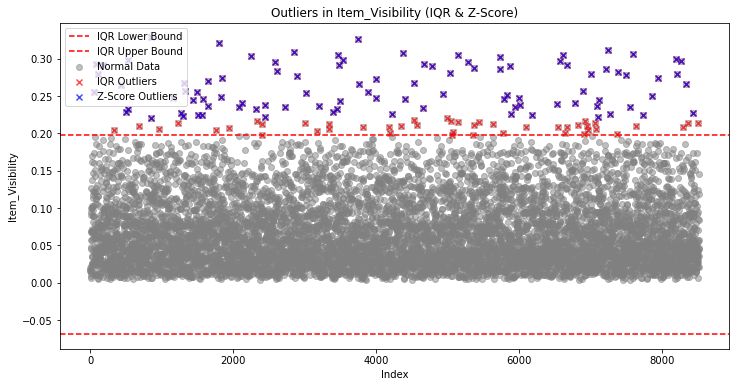

In [487]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Select column for outlier detection
column = 'Item_Visibility'  # Change this as needed

# Compute IQR
Q1 = train_df[column].quantile(0.25)
Q3 = train_df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify IQR-based outliers
train_df['IQR_Outlier'] = (train_df[column] < lower_bound) | (train_df[column] > upper_bound)


# Identify Z-score outliers (threshold ±3)
train_df['Z_Outlier'] = abs(train_df['Z_Score']) > 3

# Scatter plot to visualize outliers
plt.figure(figsize=(12, 6))

# Plot normal data points
plt.scatter(range(len(train_df)), train_df[column], color='gray', alpha=0.5, label='Normal Data')

# Plot IQR outliers in red
plt.scatter(train_df[train_df['IQR_Outlier']].index, train_df[train_df['IQR_Outlier']][column], 
            color='red', alpha=0.7, label='IQR Outliers', marker='x')

# Plot Z-score outliers in blue
plt.scatter(train_df[train_df['Z_Outlier']].index, train_df[train_df['Z_Outlier']][column], 
            color='blue', alpha=0.7, label='Z-Score Outliers', marker='x')

# Add IQR bounds as dashed red lines
plt.axhline(y=lower_bound, color='red', linestyle='dashed', label='IQR Lower Bound')
plt.axhline(y=upper_bound, color='red', linestyle='dashed', label='IQR Upper Bound')

# Formatting
plt.title(f"Outliers in {column} (IQR & Z-Score)")
plt.xlabel("Index")
plt.ylabel(column)
plt.legend()
plt.show()


Pearson Correlation: -0.1282
Spearman Correlation: -0.1166


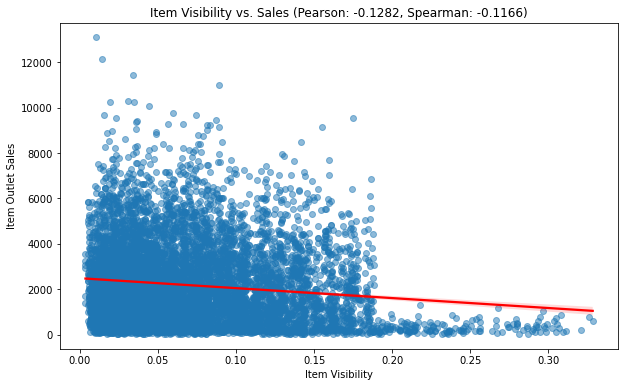

In [488]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Pearson and Spearman correlations
pearson_corr = train_df[['Item_Visibility', 'Item_Outlet_Sales']].corr(method='pearson').iloc[0,1]
spearman_corr = train_df[['Item_Visibility', 'Item_Outlet_Sales']].corr(method='spearman').iloc[0,1]

print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")

# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Item Visibility vs. Sales (Pearson: {pearson_corr:.4f}, Spearman: {spearman_corr:.4f})")
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.show()


In [489]:
# anything beyond 0.2 and with sales less than say 2000 can be an outlier bcoz even with higher visibility 
# the sales are low ...

In [490]:
# Define outliers based on Item Visibility > 0.2
visibility_outliers = train_df[train_df["Item_Visibility"] > 0.2]

# Count how many outliers we have
print(f"Total outliers based on visibility > 0.2: {len(visibility_outliers)}")


Total outliers based on visibility > 0.2: 134


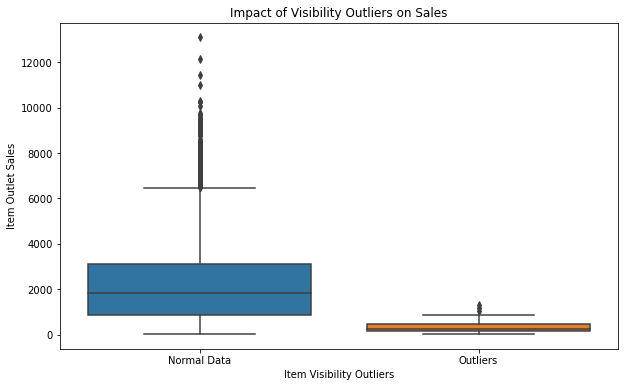

In [491]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column to label outliers
train_df["Visibility_Outlier"] = train_df["Item_Visibility"] > 0.2

plt.figure(figsize=(10, 6))
sns.boxplot(x="Visibility_Outlier", y="Item_Outlet_Sales", data=train_df)
plt.xticks([0, 1], ['Normal Data', 'Outliers'])
plt.title("Impact of Visibility Outliers on Sales")
plt.ylabel("Item Outlet Sales")
plt.xlabel("Item Visibility Outliers")
plt.show()


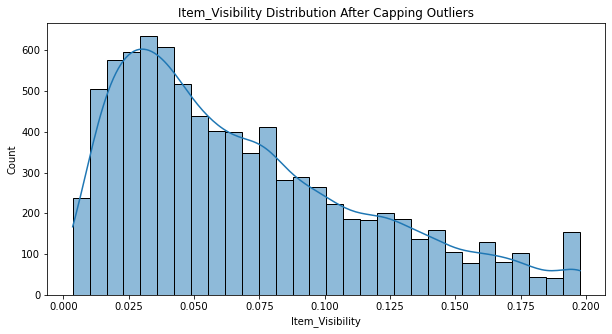

In [492]:
# Capping outliers to the upper bound 

# Calculate IQR
Q1 = train_df["Item_Visibility"].quantile(0.25)
Q3 = train_df["Item_Visibility"].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound (as per IQR method)
upper_bound = Q3 + 1.5 * IQR

# Cap Item_Visibility at upper bound
train_df.loc[train_df["Item_Visibility"] > upper_bound, "Item_Visibility"] = upper_bound

# Plot updated distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df["Item_Visibility"], bins=30, kde=True)
plt.title("Item_Visibility Distribution After Capping Outliers")
plt.xlabel("Item_Visibility")
plt.ylabel("Count")
plt.show()


## Other Data Preprocessing & Feature Engineering 

In [473]:
# Checking for duplicate records
duplicate_rows = train_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Display duplicate rows if any
if duplicate_rows.sum() > 0:
    print(train_df[duplicate_rows])

Number of duplicate rows: 0


In [474]:
# Standardize Item_Fat_Content values
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [475]:
print(train_df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [476]:
# Checking unique values in categorical columns
categorical_columns = ['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(train_df[col].unique())
    print("\n")


Unique values in Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Unique values in Outlet_Size:
['Medium' 'Small' 'High']


Unique values in Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']


Unique values in Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [477]:
# Checking for zero or negative values in numerical columns
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

for col in num_cols:
    print(f"{col}:")
    print(train_df[train_df[col] <= 0][[col, 'Item_Identifier']])
    print("\n")


Item_Weight:
Empty DataFrame
Columns: [Item_Weight, Item_Identifier]
Index: []


Item_Visibility:
      Item_Visibility Item_Identifier
3                 0.0           FDX07
4                 0.0           NCD19
5                 0.0           FDP36
10                0.0           FDY07
32                0.0           FDP33
...               ...             ...
8480              0.0           FDQ58
8484              0.0           DRJ49
8486              0.0           FDR20
8494              0.0           NCI54
8500              0.0           NCQ42

[526 rows x 2 columns]


Item_MRP:
Empty DataFrame
Columns: [Item_MRP, Item_Identifier]
Index: []




In [478]:
# Handling Zero Values in Item_Visibility
# Identify items with zero visibility
zero_visibility_count = (train_df['Item_Visibility'] == 0).sum()
print(f"Number of items with zero visibility: {zero_visibility_count}")

# Compute median visibility for each Item_Identifier
visibility_median = train_df.groupby('Item_Identifier')['Item_Visibility'].median()

# Replace zero values with median visibility
train_df.loc[train_df['Item_Visibility'] == 0, 'Item_Visibility'] = train_df['Item_Identifier'].map(visibility_median)

# Verify updates
print("Zero values in Item_Visibility after replacement:", (train_df['Item_Visibility'] == 0).sum())


Number of items with zero visibility: 526
Zero values in Item_Visibility after replacement: 4


In [479]:
# Handle any remaining zero values by replacing with overall median visibility
overall_visibility_median = train_df['Item_Visibility'].median()
train_df.loc[train_df['Item_Visibility'] == 0, 'Item_Visibility'] = overall_visibility_median

# Verify final updates
print("Zero values in Item_Visibility after final replacement:", (train_df['Item_Visibility'] == 0).sum())


Zero values in Item_Visibility after final replacement: 0


In [493]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Base,Z_Score,IQR_Outlier,Z_Outlier,Visibility_Outlier
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA,-1.084130,False,False,False
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC,-1.019478,False,False,False
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN,-1.069867,False,False,False
3,FDX07,19.200,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FDX,-0.947782,False,False,False
4,NCD19,8.930,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD,-1.273380,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FDF,-0.268986,False,False,False
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,FDS,-0.465107,False,False,False
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NCJ,-0.701152,False,False,False
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FDN,1.500676,False,False,False


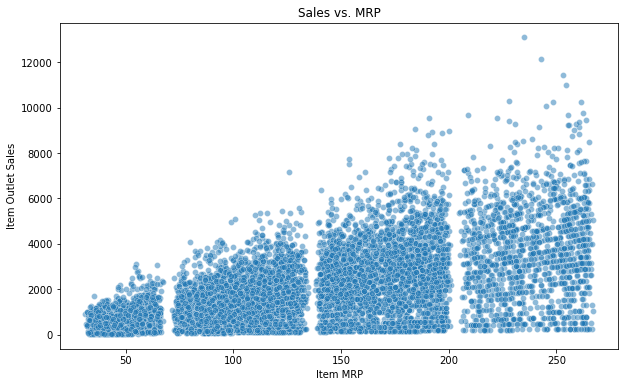

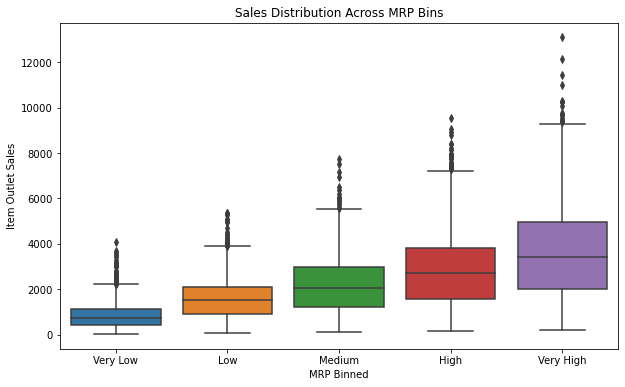

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to see the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df["Item_MRP"], y=train_df["Item_Outlet_Sales"], alpha=0.5)
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Sales vs. MRP")
plt.show()

# Boxplot to check distribution of sales across MRP bins
train_df["MRP_Binned"] = pd.qcut(train_df["Item_MRP"], q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="MRP_Binned", y="Item_Outlet_Sales", data=train_df)
plt.xlabel("MRP Binned")
plt.ylabel("Item Outlet Sales")
plt.title("Sales Distribution Across MRP Bins")
plt.show()


In [495]:
# variability within each bin is high => the exact Item_MRP value may still carry more predictive power than binning.
# Item_MRP has a strong direct correlation with sales, keeping it as a continuous variable for now...not binning

train_df.drop(columns=["MRP_Binned"], inplace=True)

In [496]:
# Feature engineering : Feature Extraction : deriving Outlet_Age from Outlet_Establishment_Year

# Using latest year in the training data 
reference_year = train_df["Outlet_Establishment_Year"].max()

train_df["Outlet_Age"] = reference_year - train_df["Outlet_Establishment_Year"]
train_df["Outlet_Age"].describe()


count    8523.000000
mean       11.168133
std         8.371760
min         0.000000
25%         5.000000
50%        10.000000
75%        22.000000
max        24.000000
Name: Outlet_Age, dtype: float64

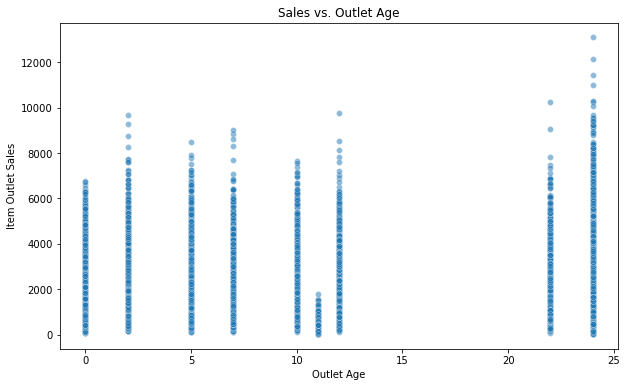

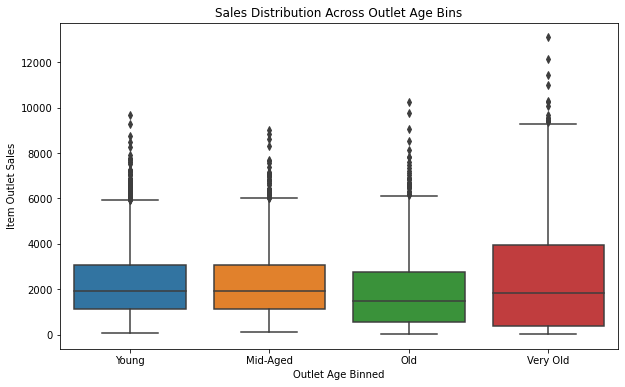

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to check the trend
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df["Outlet_Age"], y=train_df["Item_Outlet_Sales"], alpha=0.5)
plt.xlabel("Outlet Age")
plt.ylabel("Item Outlet Sales")
plt.title("Sales vs. Outlet Age")
plt.show()

# Boxplot to check distribution of sales across Outlet Age bins
train_df["Outlet_Age_Binned"] = pd.qcut(train_df["Outlet_Age"], q=4, labels=["Young", "Mid-Aged", "Old", "Very Old"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="Outlet_Age_Binned", y="Item_Outlet_Sales", data=train_df)
plt.xlabel("Outlet Age Binned")
plt.ylabel("Item Outlet Sales")
plt.title("Sales Distribution Across Outlet Age Bins")
plt.show()


In [498]:
# Outlet Age is discrete rather than continuous + medians per bin are more or less similar binning might not be useful. 
# discarding bins

train_df.drop(columns=["Outlet_Age_Binned"], inplace=True)

In [499]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Base,Z_Score,IQR_Outlier,Z_Outlier,Visibility_Outlier,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA,-1.084130,False,False,False,10
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC,-1.019478,False,False,False,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN,-1.069867,False,False,False,10
3,FDX07,19.200,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FDX,-0.947782,False,False,False,11
4,NCD19,8.930,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD,-1.273380,False,False,False,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FDF,-0.268986,False,False,False,22
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,FDS,-0.465107,False,False,False,7
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NCJ,-0.701152,False,False,False,5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FDN,1.500676,False,False,False,0


In [500]:
train_df['Item_Base'].str[:2].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [501]:
train_df[train_df['Item_Base'].str.startswith('NC')]['Item_Type'].unique()

array(['Household', 'Health and Hygiene', 'Others'], dtype=object)

In [502]:
train_df[train_df['Item_Base'].str.startswith('FD')]['Item_Type'].unique()

array(['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods',
       'Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Breads',
       'Starchy Foods', 'Seafood'], dtype=object)

In [503]:
train_df[train_df['Item_Base'].str.startswith('DR')]['Item_Type'].unique()

array(['Soft Drinks', 'Hard Drinks', 'Dairy'], dtype=object)

In [504]:
#Dairy is in both FD and DR.. diving deeper

In [505]:
train_df[(train_df['Item_Base'].str.startswith('DR')) & (train_df['Item_Type'] == 'Dairy')]['Item_Base'].unique()


array(['DRG', 'DRC', 'DRF', 'DRJ', 'DRH', 'DRI', 'DRK', 'DRE', 'DRD'],
      dtype=object)

In [506]:
train_df[(train_df['Item_Base'].str.startswith('FD')) & (train_df['Item_Type'] == 'Dairy')]['Item_Base'].unique()

array(['FDA', 'FDU', 'FDE', 'FDV', 'FDM', 'FDS', 'FDZ', 'FDD', 'FDB',
       'FDY', 'FDK', 'FDH', 'FDC', 'FDX', 'FDL', 'FDR', 'FDI', 'FDW',
       'FDJ', 'FDF', 'FDT', 'FDQ', 'FDP'], dtype=object)

In [507]:
#Categorizing the items into 3 categories insetad of numerous item_types

def categorize_item_type(df):
    # Define category mappings based on the first two letters of 'Item_Base'
    category_mapping = {
        'NC': 'Household',  # Household, Health and Hygiene, Others
        'FD': 'Food',       # Dairy, Meat, Fruits and Vegetables, Baking Goods, etc.
        'DR': 'Drinks'      # Soft Drinks, Hard Drinks, Dairy (if applicable)
    }

    # Create a new column 'Item_Category' based on 'Item_Base'
    df['Item_Category'] = df['Item_Base'].str[:2].map(category_mapping)

    return df

# Apply function to transform 'Item_Type'
train_df = categorize_item_type(train_df)

# Check results
train_df['Item_Category'].unique()


array(['Food', 'Drinks', 'Household'], dtype=object)

In [508]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Base,Z_Score,IQR_Outlier,Z_Outlier,Visibility_Outlier,Outlet_Age,Item_Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA,-1.084130,False,False,False,10,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC,-1.019478,False,False,False,0,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN,-1.069867,False,False,False,10,Food
3,FDX07,19.200,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FDX,-0.947782,False,False,False,11,Food
4,NCD19,8.930,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD,-1.273380,False,False,False,22,Household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FDF,-0.268986,False,False,False,22,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,FDS,-0.465107,False,False,False,7,Food
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NCJ,-0.701152,False,False,False,5,Household
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FDN,1.500676,False,False,False,0,Food


In [509]:
# Trying target encoding for Outlet_Identifier

In [510]:
# Group by Outlet_Identifier and compute mean sales
outlet_sales_mean = train_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
print(outlet_sales_mean)

# Check variance in sales across different outlets
outlet_sales_variance = train_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].var()
print(outlet_sales_variance)

# ANOVA test to check statistical significance
outlet_groups = [group["Item_Outlet_Sales"].values for _, group in train_df.groupby("Outlet_Identifier")]
f_stat, p_value = stats.f_oneway(*outlet_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")



Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64
Outlet_Identifier
OUT010    7.344905e+04
OUT013    2.351719e+06
OUT017    2.404912e+06
OUT018    1.893191e+06
OUT019    6.248973e+04
OUT027    4.527363e+06
OUT035    2.367021e+06
OUT045    2.138613e+06
OUT046    2.215351e+06
OUT049    2.290045e+06
Name: Item_Outlet_Sales, dtype: float64
ANOVA F-statistic: 300.0791353284904
P-value: 0.0


In [511]:
# different outlets influence sales significantly +
# outlet sales don’t behave the same way across stores
# => outlet identifier strongly affects sales.... hence applying target encoding to Outlet_Identifier

In [512]:
# pip install category_encoders

In [513]:
from category_encoders import TargetEncoder

def target_encode_outlet_train(df, target_col='Item_Outlet_Sales'):
    encoder = TargetEncoder(cols=['Outlet_Identifier'])
    df['Outlet_Identifier_Encoded'] = encoder.fit_transform(df['Outlet_Identifier'], df[target_col])
    return df, encoder  # Return both the transformed df and fitted encoder

def target_encode_outlet_test(df, encoder):
    df['Outlet_Identifier_Encoded'] = encoder.transform(df['Outlet_Identifier'])
    return df

# Apply target encoding to train_df and store the fitted encoder
train_df, outlet_encoder = target_encode_outlet_train(train_df)



In [549]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Base,Z_Score,IQR_Outlier,Z_Outlier,Visibility_Outlier,Outlet_Age,Item_Category,Outlet_Identifier_Encoded
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2681.603542,1876.909159,2316.181148,3735.1380,FDA,-1.084130,False,False,False,10,Food,2348.354635
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2681.603542,2279.627651,1995.498739,443.4228,DRC,-1.019478,False,False,False,0,Drinks,1995.498739
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2681.603542,1876.909159,2316.181148,2097.2700,FDN,-1.069867,False,False,False,10,Food,2348.354635
3,FDX07,19.200,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,1867.182814,2279.627651,339.828500,732.3800,FDX,-0.947782,False,False,False,11,Food,339.351662
4,NCD19,8.930,Low Fat,0.006590,Household,53.8614,OUT013,1987,2298.995256,2279.627651,2316.181148,994.7052,NCD,-1.273380,False,False,False,22,Household,2298.995256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,2298.995256,2279.627651,2316.181148,2778.3834,FDF,-0.268986,False,False,False,22,Food,2298.995256
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,1867.182814,2323.990559,2316.181148,549.2850,FDS,-0.465107,False,False,False,7,Food,2192.384798
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1867.182814,2323.990559,2316.181148,1193.1136,NCJ,-0.701152,False,False,False,5,Household,2438.841866
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,2681.603542,2279.627651,1995.498739,1845.5976,FDN,1.500676,False,False,False,0,Food,1995.498739


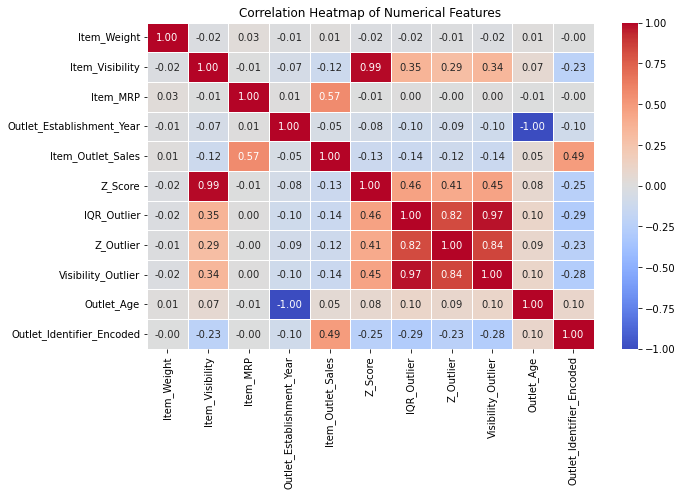

In [515]:

# Compute correlation matrix
corr_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [516]:
# no numerical features are highly correlated enough to justify dropping any of them.

In [517]:
#train_df.to_csv('cleaned_train.csv', index=False)
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Base', 'Z_Score',
       'IQR_Outlier', 'Z_Outlier', 'Visibility_Outlier', 'Outlet_Age',
       'Item_Category', 'Outlet_Identifier_Encoded'],
      dtype='object')

In [518]:
import os
print(os.getcwd())

/Users/uniquenetra/Documents/GitHub/BigMart-Sales-Prediction/notebooks


In [550]:
# Define columns to exclude from X_train
columns_to_exclude = [
    'Item_Outlet_Sales',  # Target variable
    'Item_Identifier', 
    'Outlet_Identifier', 
    'Z_Score', 
    'IQR_Outlier', 
    'Z_Outlier', 
    'Visibility_Outlier', 
    'Item_Base',  # Used only for imputing missing values
    'Item_Type',  # Redundant after categorization into Item_Category
    'Outlet_Establishment_Year'  # Replaced by Outlet_Age
]

# Create X_train and y_train without modifying train_df
X_train_clean = train_df.drop(columns=columns_to_exclude, errors='ignore')
y_train_clean = train_df['Item_Outlet_Sales']

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (6818, 10)
y_train shape: (6818,)


In [551]:
X_train_clean

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category,Outlet_Identifier_Encoded
0,9.300,Low Fat,0.016047,249.8092,2681.603542,1876.909159,2316.181148,10,Food,2348.354635
1,5.920,Regular,0.019278,48.2692,2681.603542,2279.627651,1995.498739,0,Drinks,1995.498739
2,17.500,Low Fat,0.016760,141.6180,2681.603542,1876.909159,2316.181148,10,Food,2348.354635
3,19.200,Regular,0.022861,182.0950,1867.182814,2279.627651,339.828500,11,Food,339.351662
4,8.930,Low Fat,0.006590,53.8614,2298.995256,2279.627651,2316.181148,22,Household,2298.995256
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,2298.995256,2279.627651,2316.181148,22,Food,2298.995256
8519,8.380,Regular,0.046982,108.1570,1867.182814,2323.990559,2316.181148,7,Food,2192.384798
8520,10.600,Low Fat,0.035186,85.1224,1867.182814,2323.990559,2316.181148,5,Household,2438.841866
8521,7.210,Regular,0.145221,103.1332,2681.603542,2279.627651,1995.498739,0,Food,1995.498739


In [552]:
from sklearn.model_selection import train_test_split

# Splitting into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train_clean, y_train_clean, test_size=0.2, random_state=42
)

# Check the shape of the new splits
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape


((6818, 10), (1705, 10), (6818,), (1705,))

In [553]:
# Applying label encoding for all the categorical varibales 

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}  # Store encoders to apply the same to validation data

X_train = X_train.copy()
X_validate = X_validate.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_train.loc[:, col] = le.fit_transform(X_train[col])
    label_encoders[col] = le  # Save the encoder for future use
    
    X_validate.loc[:, col] = label_encoders[col].transform(X_validate[col])  # Use same encoding


# Check encoded data
X_train.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category,Outlet_Identifier_Encoded
549,9.500,1,0.035206,171.3448,2681.603542,1876.909159,2316.181148,10,1,2348.354635
7757,18.000,0,0.047473,170.5422,1867.182814,2323.990559,2316.181148,7,2,2192.384798
764,17.600,1,0.076122,111.7202,1867.182814,1876.909159,2316.181148,12,1,2277.844267
6867,8.325,0,0.029845,41.6138,1867.182814,2323.990559,2316.181148,7,1,2192.384798
2716,12.850,0,0.137228,155.5630,1867.182814,1876.909159,2316.181148,12,1,2277.844267


In [554]:
categorical_cols

Index(['Item_Fat_Content', 'Item_Category'], dtype='object')

In [555]:
X_validate.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category,Outlet_Identifier_Encoded
7503,14.300,0,0.026300,79.4302,2298.995256,2279.627651,2316.181148,22,1,2298.995256
2957,7.930,0,0.071136,42.7086,1867.182814,1876.909159,2316.181148,12,2,2277.844267
7031,14.500,1,0.041313,42.0454,2681.603542,1876.909159,2316.181148,10,1,2348.354635
1084,13.000,1,0.044767,173.7054,2681.603542,2279.627651,3694.038558,24,0,3694.038558
856,10.195,1,0.012456,197.5110,1867.182814,2323.990559,2316.181148,5,1,2438.841866


# Getting the test csv upto the mark with all the changes

In [610]:
test_df = pd.read_csv('../data/Test.csv')
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [586]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [587]:
# Filling missing Item_Weight using median per Item_Identifier

# Compute median Item_Weight per Item_Identifier from train_df
item_weight_medians = train_df.groupby('Item_Identifier')['Item_Weight'].median()

# Map those values to test_df, filling missing values
test_df['Item_Weight'] = test_df['Item_Identifier'].map(item_weight_medians)


In [588]:
test_df[test_df["Item_Weight"].isnull()]["Item_Identifier"]

Series([], Name: Item_Identifier, dtype: object)

In [589]:
# Compute the most common Outlet_Size per Outlet_Identifier from train_df
outlet_size_mode = train_df.groupby('Outlet_Identifier')['Outlet_Size'].agg(lambda x: x.mode()[0] if not x.isna().all() else np.nan)

# Map those values to test_df, filling missing Outlet_Size values
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Identifier'].map(outlet_size_mode))


In [616]:
# Convert to lowercase to avoid case mismatches
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].str.lower()

# Standardize values
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({
    'lf': 'Low Fat', 
    'low fat': 'Low Fat', 
    'reg': 'Regular',
    'regular': 'Regular'
})


In [615]:
# Handling Zero Values in Item_Visibility
# Identify items with zero visibility
zero_visibility_count = (test_df['Item_Visibility'] == 0).sum()
print(f"Number of items with zero visibility: {zero_visibility_count}")

# Compute median visibility for each Item_Identifier from train_df
visibility_median = train_df.groupby('Item_Identifier')['Item_Visibility'].median()

# Replace zero values in test_df with median visibility from train_df
test_df.loc[test_df['Item_Visibility'] == 0, 'Item_Visibility'] = test_df['Item_Identifier'].map(visibility_median)

# Fill any remaining NaN values with the overall median (in case some Item_Identifiers are missing in train_df)
test_df['Item_Visibility'].fillna(test_df['Item_Visibility'].median(), inplace=True)

# Verify updates
print("Zero values in Item_Visibility after replacement:", (test_df['Item_Visibility'] == 0).sum())


Number of items with zero visibility: 353
Zero values in Item_Visibility after replacement: 0


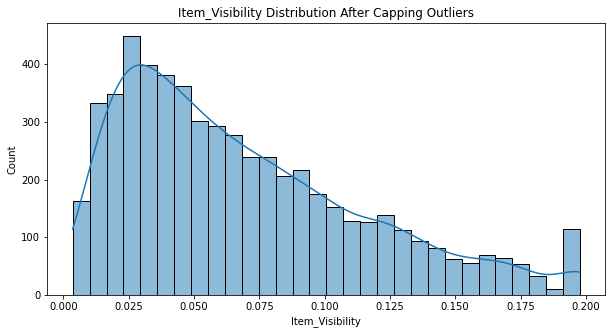

In [592]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate IQR from train_df to ensure consistency
Q1 = train_df["Item_Visibility"].quantile(0.25)
Q3 = train_df["Item_Visibility"].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound using IQR method
upper_bound = Q3 + 1.5 * IQR

# Cap Item_Visibility at upper bound in test_df
test_df.loc[test_df["Item_Visibility"] > upper_bound, "Item_Visibility"] = upper_bound

# Plot updated distribution
plt.figure(figsize=(10, 5))
sns.histplot(test_df["Item_Visibility"], bins=30, kde=True)
plt.title("Item_Visibility Distribution After Capping Outliers")
plt.xlabel("Item_Visibility")
plt.ylabel("Count")
plt.show()


In [593]:

# Feature engineering : Feature Extraction : deriving Outlet_Age from Outlet_Establishment_Year

# Calculate Outlet Age by subtracting the establishment year from the current year
test_df["Outlet_Age"] = reference_year - test_df["Outlet_Establishment_Year"]

# Display summary statistics to understand the distribution of Outlet Age
test_df["Outlet_Age"].describe()

count    5681.000000
mean       11.171097
std         8.372256
min         0.000000
25%         5.000000
50%        10.000000
75%        22.000000
max        24.000000
Name: Outlet_Age, dtype: float64

In [594]:
def categorize_item_type(df):
    # Ensure 'Item_Base' column exists
    if 'Item_Base' not in df.columns:
        df['Item_Base'] = df['Item_Identifier'].str[:2]  # Extract first two letters

    # Define category mappings based on 'Item_Base'
    category_mapping = {
        'NC': 'Household',  
        'FD': 'Food',       
        'DR': 'Drinks'      
    }

    # Map the categories
    df['Item_Category'] = df['Item_Base'].map(category_mapping)

    return df

# Apply transformation
test_df = categorize_item_type(test_df)

# Check results
print(test_df['Item_Category'].unique())


['Food' 'Household' 'Drinks']


In [595]:
# Apply the same encoder to test_df as train_df
test_df = target_encode_outlet_test(test_df, outlet_encoder)

In [604]:
test_df.to_csv('cleaned_test.csv', index=False)
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age', 'Item_Base', 'Item_Category',
       'Outlet_Identifier_Encoded'],
      dtype='object')

In [597]:
categorical_cols

Index(['Item_Fat_Content', 'Item_Category'], dtype='object')

In [617]:
test_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [618]:
for col in categorical_cols:
    if col in test_df.columns:
        test_df[col] = label_encoders[col].transform(test_df[col])



In [622]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,2181.288914,2181.288914,2181.288914
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,2181.288914,2181.288914,2181.288914
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,2181.288914,2181.288914,2181.288914
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,2181.288914,2181.288914,2181.288914
4,FDY38,NaN,1,0.118599,Dairy,234.2300,OUT027,1985,2181.288914,2181.288914,2181.288914
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,1,0.013496,Snack Foods,141.3154,OUT046,1997,2181.288914,2181.288914,2181.288914
5677,FDD47,7.600,1,0.142991,Starchy Foods,169.1448,OUT018,2009,2181.288914,2181.288914,2181.288914
5678,NCO17,10.000,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,2181.288914,2181.288914,2181.288914
5679,FDJ26,15.300,1,0.084765,Canned,214.6218,OUT017,2007,2181.288914,2181.288914,2181.288914


# Model Building, Tuning & Evaluation

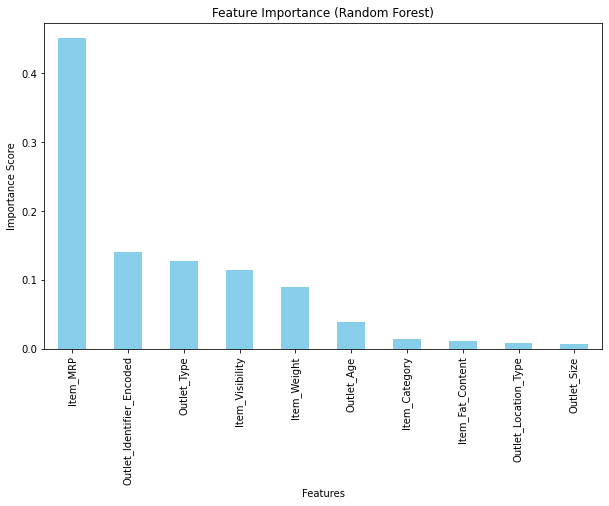

In [556]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and visualize
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [557]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 741.3495677853372
Mean Squared Error (MSE): 1131440.1906645817
Root Mean Squared Error (RMSE): 1063.6917742770138
R² Score: 0.5837186713123088


In [559]:
feature_importance

Item_Weight                  0.089728
Item_Fat_Content             0.010653
Item_Visibility              0.114473
Item_MRP                     0.450691
Outlet_Size                  0.006755
Outlet_Location_Type         0.008637
Outlet_Type                  0.126490
Outlet_Age                   0.038067
Item_Category                0.014191
Outlet_Identifier_Encoded    0.140316
dtype: float64

In [527]:
# trying RandomizedSearchCV

In [558]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [10, 20, 30, 40, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features per split
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random settings to try
    scoring='neg_root_mean_squared_error',  # Optimize for lowest RMSE
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on validation set
y_pred = best_rf.predict(X_validate)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Mean Absolute Error (MAE): 718.6978593849619
Mean Squared Error (MSE): 1041425.9496709794
Root Mean Squared Error (RMSE): 1020.5027925836262
R² Score: 0.6168368583369548


In [560]:
# Drop least important features
low_importance_features = ['Outlet_Size', 'Outlet_Location_Type']
X_train_reduced_2 = X_train.drop(columns=low_importance_features)
X_validate_reduced_2 = X_validate.drop(columns=low_importance_features)

print(f"Removed features: {low_importance_features}")


Removed features: ['Outlet_Size', 'Outlet_Location_Type']


In [561]:
# Train RandomForest with optimized hyperparameters
rf_reduced_2 = RandomForestRegressor(n_estimators=200, min_samples_split=2, 
                                   min_samples_leaf=4, max_features='log2', max_depth=10, random_state=42)
rf_reduced_2.fit(X_train_reduced_2, y_train)

# Predict on validation set
Y_pred_reduced_2 = rf_reduced_2.predict(X_validate_reduced_2)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_validate, Y_pred_reduced_2)
mse = mean_squared_error(y_validate, Y_pred_reduced_2)
rmse = mse ** 0.5
r2 = r2_score(y_validate, Y_pred_reduced_2)

print(f"New Model Performance After Removing Features:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


New Model Performance After Removing Features:
MAE: 711.6974503250653
MSE: 1030617.487373628
RMSE: 1015.1933251226724
R² Score: 0.6208135254938547


In [562]:
# Drop more less important features
low_importance_features = ['Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content', 'Item_Category']
X_train_reduced_4 = X_train.drop(columns=low_importance_features)
X_validate_reduced_4 = X_validate.drop(columns=low_importance_features)

print(f"Removed features: {low_importance_features}")


Removed features: ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Item_Category']


In [533]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category,Outlet_Identifier_Encoded
549,9.500,1,0.035206,171.3448,1,0,1,10,1,2348.354635
7757,18.000,0,0.047473,170.5422,2,1,1,7,2,2192.384798
764,17.600,1,0.076122,111.7202,2,0,1,12,1,2277.844267
6867,8.325,0,0.029845,41.6138,2,1,1,7,1,2192.384798
2716,12.850,0,0.137228,155.5630,2,0,1,12,1,2277.844267
...,...,...,...,...,...,...,...,...,...,...
5734,9.395,1,0.197746,139.1838,2,2,0,11,1,339.351662
5191,15.600,0,0.117575,75.6670,2,1,1,2,1,2340.675263
5390,17.600,0,0.018944,237.3590,2,1,1,7,2,2192.384798
860,20.350,0,0.054363,117.9466,2,1,1,2,1,2340.675263


In [563]:
# Train RandomForest with optimized hyperparameters
rf_reduced_4 = RandomForestRegressor(n_estimators=200, min_samples_split=2, 
                                   min_samples_leaf=4, max_features='log2', max_depth=10, random_state=42)
rf_reduced_4.fit(X_train_reduced_4, y_train)

# Predict on validation set
Y_pred_reduced_4 = rf_reduced_4.predict(X_validate_reduced_4)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_validate, Y_pred_reduced_4)
mse = mean_squared_error(y_validate, Y_pred_reduced_4)
rmse = mse ** 0.5
r2 = r2_score(y_validate, Y_pred_reduced_4)

print(f"New Model Performance After Removing Features:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


New Model Performance After Removing Features:
MAE: 710.8926004491361
MSE: 1028110.1838236041
RMSE: 1013.9576834481823
R² Score: 0.6217360167239163


In [579]:
# Keep Item_Identifier & Outlet_Identifier for final submission
submission_ids = test_df[['Item_Identifier', 'Outlet_Identifier']]

# Define columns to exclude for model input
columns_to_exclude = [
    'Item_Outlet_Sales',  # Not present in test data
    'Item_Identifier',  # Kept separately for final submission
    'Outlet_Identifier',  # Kept separately for final submission
    'Item_Base',  # Used only for imputing missing values
    'Item_Type',  # Redundant after categorization into Item_Category
    'Outlet_Establishment_Year'  # Replaced by Outlet_Age
]

# Create X_test (features only)
X_test = test_df.drop(columns=columns_to_exclude, errors='ignore')

# Check the shape of X_test
print("X_test shape:", X_test.shape)

X_test shape: (5681, 10)


In [601]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Base,Item_Category,Outlet_Identifier_Encoded
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,10,FD,0,2348.354635
1,FDW14,8.300,0,0.038428,Dairy,87.3198,OUT017,2007,1867.182814,Tier 2,Supermarket Type1,2,FD,0,2340.675263
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,1867.182814,Tier 3,Grocery Store,11,NC,0,339.351662
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,1867.182814,Tier 2,Supermarket Type1,2,FD,0,2340.675263
4,FDY38,13.600,0,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,24,FD,0,3694.038558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,0,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,12,FD,0,2277.844267
5677,FDD47,7.600,0,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,FD,0,1995.498739
5678,NCO17,10.000,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,1867.182814,Tier 2,Supermarket Type1,7,NC,0,2192.384798
5679,FDJ26,15.300,0,0.084765,Canned,214.6218,OUT017,2007,1867.182814,Tier 2,Supermarket Type1,2,FD,0,2340.675263


In [192]:
# Drop least important features
low_importance_features = ['Outlet_Size', 'Outlet_Location_Type']
X_test_reduced_2 = X_test.drop(columns=low_importance_features)

print(f"Removed features: {low_importance_features}")

Removed features: ['Outlet_Size', 'Outlet_Location_Type']


In [196]:
# Drop least important features
low_importance_features = ['Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content', 'Item_Category']
X_test_reduced_4 = X_test.drop(columns=low_importance_features)

print(f"Removed features: {low_importance_features}")

Removed features: ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Item_Category']


In [197]:
# Generate predictions using the trained model
y_pred = rf_reduced_4.predict(X_test_reduced_4)


In [198]:
# Create a DataFrame with required columns
submission_df = pd.DataFrame({
    'Item_Identifier': test_df['Item_Identifier'],  
    'Outlet_Identifier': test_df['Outlet_Identifier'],
    'Item_Outlet_Sales': y_pred  # Predicted sales
})

# Save to CSV
submission_df.to_csv('../submission/submission.csv', index=False)

print("Submission file saved successfully!")


Submission file saved successfully!


In [199]:
#Trying XgBoost

In [1597]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.0 MB/s eta 0:00:0000:0100:01


In [200]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [201]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category,Outlet_Identifier_Encoded
549,9.500,1,0.035206,171.3448,1,0,1,10,1,2348.354635
7757,18.000,0,0.047473,170.5422,2,1,1,7,2,2192.384798
764,17.600,1,0.076122,111.7202,2,0,1,12,1,2277.844267
6867,8.325,0,0.029845,41.6138,2,1,1,7,1,2192.384798
2716,12.850,0,0.137228,155.5630,2,0,1,12,1,2277.844267
...,...,...,...,...,...,...,...,...,...,...
5734,9.395,1,0.197746,139.1838,2,2,0,11,1,339.351662
5191,15.600,0,0.117575,75.6670,2,1,1,2,1,2340.675263
5390,17.600,0,0.018944,237.3590,2,1,1,7,2,2192.384798
860,20.350,0,0.054363,117.9466,2,1,1,2,1,2340.675263


In [202]:
X_train_reduced_2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Outlet_Age,Item_Category,Outlet_Identifier_Encoded
549,9.500,1,0.035206,171.3448,1,10,1,2348.354635
7757,18.000,0,0.047473,170.5422,1,7,2,2192.384798
764,17.600,1,0.076122,111.7202,1,12,1,2277.844267
6867,8.325,0,0.029845,41.6138,1,7,1,2192.384798
2716,12.850,0,0.137228,155.5630,1,12,1,2277.844267
...,...,...,...,...,...,...,...,...
5734,9.395,1,0.197746,139.1838,0,11,1,339.351662
5191,15.600,0,0.117575,75.6670,1,2,1,2340.675263
5390,17.600,0,0.018944,237.3590,1,7,2,2192.384798
860,20.350,0,0.054363,117.9466,1,2,1,2340.675263


In [203]:
X_test_reduced_2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Outlet_Age,Item_Category,Outlet_Identifier_Encoded
0,20.750,1,0.007565,107.8622,1,10,1,2348.354635
1,8.300,1,0.038428,87.3198,1,2,1,2340.675263
2,14.600,1,0.099575,241.7538,0,11,2,339.351662
3,7.315,1,0.015388,155.0340,1,2,1,2340.675263
4,13.600,1,0.118599,234.2300,3,24,1,3694.038558
...,...,...,...,...,...,...,...,...
5676,10.500,1,0.013496,141.3154,1,12,1,2277.844267
5677,7.600,1,0.142991,169.1448,2,0,1,1995.498739
5678,10.000,1,0.073529,118.7440,1,7,2,2192.384798
5679,15.300,1,0.084765,214.6218,1,2,1,2340.675263


In [204]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_reduced_2, label=y_train)
dvalid = xgb.DMatrix(X_validate_reduced_2, label=y_validate)
dtest = xgb.DMatrix(X_test_reduced_2)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model using XGBoost's native API
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, 
                      evals=watchlist, early_stopping_rounds=50, verbose_eval=100)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on validation set
y_valid_pred = xgb_model.predict(dvalid)

# Evaluate performance
mae = mean_absolute_error(y_validate, y_valid_pred)
mse = mean_squared_error(y_validate, y_valid_pred)
rmse = mse ** 0.5
r2 = r2_score(y_validate, y_valid_pred)

print("\n✅ Model Performance on Validation Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


# Make predictions on test set
y_test_pred = xgb_model.predict(dtest)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_pred

# Save CSV
submission.to_csv('../submission/submission_xgboost.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")


[0]	train-rmse:1668.57890	eval-rmse:1601.65070
[100]	train-rmse:976.54877	eval-rmse:1028.57374
[121]	train-rmse:952.11128	eval-rmse:1032.22118

✅ Model Performance on Validation Set:
MAE: 718.0657
MSE: 1065480.5626
RMSE: 1032.2212
R² Score: 0.6080
Download your submission file: /mnt/data/submission_xgboost.csv


In [207]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_reduced_4, label=y_train)
dvalid = xgb.DMatrix(X_validate_reduced_4, label=y_validate)
dtest = xgb.DMatrix(X_test_reduced_4)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model using XGBoost's native API
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, 
                      evals=watchlist, early_stopping_rounds=50, verbose_eval=100)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on validation set
y_valid_pred = xgb_model.predict(dvalid)

# Evaluate performance
mae = mean_absolute_error(y_validate, y_valid_pred)
mse = mean_squared_error(y_validate, y_valid_pred)
rmse = mse ** 0.5
r2 = r2_score(y_validate, y_valid_pred)

print("\n✅ Model Performance on Validation Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


# Make predictions on test set
y_test_pred = xgb_model.predict(dtest)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_pred

submission['Item_Outlet_Sales'] = y_test_pred.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_xgboost.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")


[0]	train-rmse:1668.60269	eval-rmse:1601.73267
[100]	train-rmse:992.00730	eval-rmse:1031.32100
[136]	train-rmse:952.97097	eval-rmse:1037.28591

✅ Model Performance on Validation Set:
MAE: 723.9676
MSE: 1077271.7198
RMSE: 1037.9170
R² Score: 0.6036
Download your submission file: /mnt/data/submission_xgboost.csv


In [209]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.6 MB/s eta 0:00:00


In [211]:
import xgboost
print(xgboost.__version__)


2.1.4


In [220]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0),
    }

    model = xgb.XGBRegressor(**params)
    # ✅ Train without early stopping
    model.fit(X_train_reduced_2, y_train, eval_set=[(X_validate_reduced_2, y_validate)], verbose=False) 
    

    
    preds = model.predict(X_validate_reduced_2)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Best Parameters:", study.best_params)


[I 2025-03-15 03:00:43,627] A new study created in memory with name: no-name-dbab950c-a188-4547-9145-31baaeb9bb31
[I 2025-03-15 03:00:45,163] Trial 0 finished with value: 1055.0575275712345 and parameters: {'learning_rate': 0.027023361561546305, 'max_depth': 5, 'subsample': 0.6524523968082137, 'colsample_bytree': 0.8429542588578068, 'n_estimators': 719, 'reg_lambda': 0.7424204239032878, 'reg_alpha': 7.1662479635081295}. Best is trial 0 with value: 1055.0575275712345.
[I 2025-03-15 03:00:45,840] Trial 1 finished with value: 1057.937128836001 and parameters: {'learning_rate': 0.08538436237662946, 'max_depth': 3, 'subsample': 0.7221863771798754, 'colsample_bytree': 0.8772084800844302, 'n_estimators': 693, 'reg_lambda': 3.9293061695704514, 'reg_alpha': 5.59334706232656}. Best is trial 0 with value: 1055.0575275712345.
[I 2025-03-15 03:00:46,738] Trial 2 finished with value: 1064.9716681560192 and parameters: {'learning_rate': 0.07818238695832193, 'max_depth': 3, 'subsample': 0.912361984286

Best Parameters: {'learning_rate': 0.010925883909659774, 'max_depth': 6, 'subsample': 0.7063310687087255, 'colsample_bytree': 0.5210986888615039, 'n_estimators': 999, 'reg_lambda': 8.032942111170858, 'reg_alpha': 2.467101626786473}


In [218]:
best_params = {
    'learning_rate': 0.049370641275108124,
    'max_depth': 4,
    'subsample': 0.7961244202352257,
    'colsample_bytree': 0.8217102383349333,
    'n_estimators': 108,
    'reg_lambda': 5.0186085480426526,
    'reg_alpha': 4.973914652686511,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

final_model = xgb.XGBRegressor(**best_params)

# Train on full training data
final_model.fit(X_train_reduced_2, y_train)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on training and validation sets
y_train_pred = final_model.predict(X_train_reduced_2)
y_valid_pred = final_model.predict(X_validate_reduced_2)

# Evaluate performance on Training Set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)

# Evaluate performance on Validation Set
mae_valid = mean_absolute_error(y_validate, y_valid_pred)
mse_valid = mean_squared_error(y_validate, y_valid_pred)
rmse_valid = mse_valid ** 0.5
r2_valid = r2_score(y_validate, y_valid_pred)

print("\n✅ Model Performance on Training Set:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\n✅ Model Performance on Validation Set:")
print(f"MAE: {mae_valid:.4f}")
print(f"MSE: {mse_valid:.4f}")
print(f"RMSE: {rmse_valid:.4f}")
print(f"R² Score: {r2_valid:.4f}")


# Predict on test set
y_test_preds = final_model.predict(X_test_reduced_2)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_xgboost.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



✅ Model Performance on Training Set:
MAE: 740.6271
MSE: 1106973.1637
RMSE: 1052.1279
R² Score: 0.6258

✅ Model Performance on Validation Set:
MAE: 713.9243
MSE: 1035654.3635
RMSE: 1017.6710
R² Score: 0.6190
Download your submission file: /mnt/data/submission_xgboost.csv


In [221]:
best_params = {
    'learning_rate': 0.049370641275108124,
    'max_depth': 4,
    'subsample': 0.7961244202352257,
    'colsample_bytree': 0.8217102383349333,
    'n_estimators': 108,
    'reg_lambda': 5.0186085480426526,
    'reg_alpha': 4.973914652686511,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

final_model = xgb.XGBRegressor(**best_params)

# Train on full training data
final_model.fit(X_train_reduced_4, y_train)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on training and validation sets
y_train_pred = final_model.predict(X_train_reduced_4)
y_valid_pred = final_model.predict(X_validate_reduced_4)

# Evaluate performance on Training Set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)

# Evaluate performance on Validation Set
mae_valid = mean_absolute_error(y_validate, y_valid_pred)
mse_valid = mean_squared_error(y_validate, y_valid_pred)
rmse_valid = mse_valid ** 0.5
r2_valid = r2_score(y_validate, y_valid_pred)

print("\n✅ Model Performance on Training Set:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\n✅ Model Performance on Validation Set:")
print(f"MAE: {mae_valid:.4f}")
print(f"MSE: {mse_valid:.4f}")
print(f"RMSE: {rmse_valid:.4f}")
print(f"R² Score: {r2_valid:.4f}")


# Predict on test set
y_test_preds = final_model.predict(X_test_reduced_4)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_xgboost.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



✅ Model Performance on Training Set:
MAE: 741.9774
MSE: 1110301.3116
RMSE: 1053.7084
R² Score: 0.6247

✅ Model Performance on Validation Set:
MAE: 713.7179
MSE: 1036888.5159
RMSE: 1018.2772
R² Score: 0.6185
Download your submission file: /mnt/data/submission_xgboost.csv


In [222]:
!pip install lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.9 MB/s eta 0:00:0000:0100:01


In [224]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 500,
    'reg_lambda': 5.0,
    'reg_alpha': 5.0
}

# Initialize model
model = lgb.LGBMRegressor(**params)

# Train
model.fit(
    X_train_reduced_2, y_train,
    eval_set=[(X_validate_reduced_2, y_validate)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(50, verbose=True)]
)


# Predictions
y_train_pred = model.predict(X_train_reduced_2)
y_valid_pred = model.predict(X_validate_reduced_2)

# Evaluate performance
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)

    print(f"\n✅ Model Performance on {dataset_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_validate, y_valid_pred, "Validation Set")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	valid_0's rmse: 1017.6

✅ Model Performance on Training Set:
MAE: 721.2155
MSE: 1026141.9564
RMSE: 1012.9867
R² Score: 0.6531

✅ Model Performance on Validation Set:
MAE: 714.0941
MSE: 1035503.7366
RMSE: 1017.5970
R² Score: 0.6190


In [227]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0),
        'n_estimators': 108,  # Keeping it fixed for now
    }

    model = lgb.LGBMRegressor(**params)
    eval_result = {}
    model.fit(
        X_train_reduced_2, y_train, 
        eval_set=[(X_validate_reduced_2, y_validate)], 
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(50, verbose=False),  # Stops early if no improvement
                   lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate_reduced_2)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


[I 2025-03-15 03:18:40,291] A new study created in memory with name: no-name-f046037f-d5ec-4e4e-be52-1c05a67b52ba
[I 2025-03-15 03:18:40,492] Trial 0 finished with value: 1024.8462838054704 and parameters: {'learning_rate': 0.04103737737881293, 'num_leaves': 115, 'max_depth': 13, 'min_child_samples': 66, 'colsample_bytree': 0.6535239921345797, 'subsample': 0.5172077086665636, 'reg_lambda': 5.304682701549447, 'reg_alpha': 2.6167419312255817}. Best is trial 0 with value: 1024.8462838054704.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:40,652] Trial 1 finished with value: 1298.41828839023 and parameters: {'learning_rate': 0.009550019149839356, 'num_leaves': 123, 'max_depth': 9, 'min_child_samples': 64, 'colsample_bytree': 0.5089248891407203, 'subsample': 0.6222304815165993, 'reg_lambda': 0.4091114090934726, 'reg_alpha': 2.6718780613129747}. Best is trial 0 with value: 1024.8462838054704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:40,818] Trial 2 finished with value: 1176.8213995121253 and parameters: {'learning_rate': 0.009628679353410486, 'num_leaves': 73, 'max_depth': 9, 'min_child_samples': 23, 'colsample_bytree': 0.6164008149537927, 'subsample': 0.617779355499304, 'reg_lambda': 4.329773487007207, 'reg_alpha': 5.783457309502808}. Best is trial 0 with value: 1024.8462838054704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:40,965] Trial 3 finished with value: 1037.6709746039035 and parameters: {'learning_rate': 0.019327370841848157, 'num_leaves': 80, 'max_depth': 7, 'min_child_samples': 37, 'colsample_bytree': 0.7922700825217603, 'subsample': 0.989157252385639, 'reg_lambda': 1.4993847892621335, 'reg_alpha': 2.1808969635770903}. Best is trial 0 with value: 1024.8462838054704.
[I 2025-03-15 03:18:41,110] Trial 4 finished with value: 1022.4128488170221 and parameters: {'learning_rate': 0.049770288591204935, 'num_leaves': 86, 'max_depth': 15, 'min_child_samples': 81, 'colsample_bytree': 0.5691140237896395, 'subsample': 0.846276588630612, 'reg_lambda': 7.239437853462218, 'reg_alpha': 3.87390983483727}. Best is trial 4 with value: 1022.4128488170221.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:41,295] Trial 5 finished with value: 1264.8838378742962 and parameters: {'learning_rate': 0.006547184199808609, 'num_leaves': 133, 'max_depth': 9, 'min_child_samples': 22, 'colsample_bytree': 0.6255112300367858, 'subsample': 0.6297192238724367, 'reg_lambda': 0.7570855392371023, 'reg_alpha': 1.3822093622293241}. Best is trial 4 with value: 1022.4128488170221.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:41,496] Trial 6 finished with value: 1023.479786580807 and parameters: {'learning_rate': 0.03355918209418143, 'num_leaves': 136, 'max_depth': 13, 'min_child_samples': 49, 'colsample_bytree': 0.6649193598152191, 'subsample': 0.726070588969934, 'reg_lambda': 7.783403474997471, 'reg_alpha': 6.206386766807102}. Best is trial 4 with value: 1022.4128488170221.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:41,693] Trial 7 finished with value: 1017.8163494458911 and parameters: {'learning_rate': 0.045403500659498344, 'num_leaves': 123, 'max_depth': 11, 'min_child_samples': 39, 'colsample_bytree': 0.9858361400741893, 'subsample': 0.6080524426329024, 'reg_lambda': 2.2631037297055485, 'reg_alpha': 3.4171807701313863}. Best is trial 7 with value: 1017.8163494458911.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:41,832] Trial 8 finished with value: 1147.3192266932215 and parameters: {'learning_rate': 0.009876122257625387, 'num_leaves': 140, 'max_depth': 8, 'min_child_samples': 49, 'colsample_bytree': 0.7172756848976767, 'subsample': 0.5922838507897324, 'reg_lambda': 5.789168919125098, 'reg_alpha': 8.856560770339227}. Best is trial 7 with value: 1017.8163494458911.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:41,995] Trial 9 finished with value: 1025.4721017277936 and parameters: {'learning_rate': 0.019833076945772923, 'num_leaves': 131, 'max_depth': 13, 'min_child_samples': 79, 'colsample_bytree': 0.9570669350871787, 'subsample': 0.8661926180033771, 'reg_lambda': 1.5619914333397387, 'reg_alpha': 6.124671180597352}. Best is trial 7 with value: 1017.8163494458911.
[I 2025-03-15 03:18:42,109] Trial 10 finished with value: 1015.0252954880722 and parameters: {'learning_rate': 0.04943173016597288, 'num_leaves': 195, 'max_depth': 4, 'min_child_samples': 10, 'colsample_bytree': 0.9962263089894844, 'subsample': 0.7897630771093755, 'reg_lambda': 3.3165727464231587, 'reg_alpha': 0.09101249697104308}. Best is trial 10 with value: 1015.0252954880722.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:42,223] Trial 11 finished with value: 1016.2864637797077 and parameters: {'learning_rate': 0.04946500272089607, 'num_leaves': 170, 'max_depth': 4, 'min_child_samples': 13, 'colsample_bytree': 0.9972374871288323, 'subsample': 0.7514920654751358, 'reg_lambda': 3.397762285871863, 'reg_alpha': 0.2637334056718563}. Best is trial 10 with value: 1015.0252954880722.
[I 2025-03-15 03:18:42,329] Trial 12 finished with value: 1018.1320419057848 and parameters: {'learning_rate': 0.03762092065018635, 'num_leaves': 194, 'max_depth': 3, 'min_child_samples': 10, 'colsample_bytree': 0.8825666098997279, 'subsample': 0.7667751988559094, 'reg_lambda': 3.746633196312701, 'reg_alpha': 0.29191846428333523}. Best is trial 10 with value: 1015.0252954880722.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:42,502] Trial 13 finished with value: 1023.8578065513024 and parameters: {'learning_rate': 0.02838856040420768, 'num_leaves': 197, 'max_depth': 3, 'min_child_samples': 10, 'colsample_bytree': 0.8747364939641198, 'subsample': 0.7490093186418311, 'reg_lambda': 2.9541249671056296, 'reg_alpha': 0.1172930845427862}. Best is trial 10 with value: 1015.0252954880722.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:42,647] Trial 14 finished with value: 1012.013149784928 and parameters: {'learning_rate': 0.0494870234107932, 'num_leaves': 166, 'max_depth': 5, 'min_child_samples': 26, 'colsample_bytree': 0.8989969848346284, 'subsample': 0.8637187568422057, 'reg_lambda': 6.391750053983825, 'reg_alpha': 1.0522543723434077}. Best is trial 14 with value: 1012.013149784928.
[I 2025-03-15 03:18:42,773] Trial 15 finished with value: 1012.7406132636165 and parameters: {'learning_rate': 0.04217398263467293, 'num_leaves': 33, 'max_depth': 6, 'min_child_samples': 29, 'colsample_bytree': 0.8839852975322562, 'subsample': 0.9266095222310242, 'reg_lambda': 6.337165179145915, 'reg_alpha': 7.915157771896723}. Best is trial 14 with value: 1012.013149784928.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:42,871] Trial 16 finished with value: 1012.9048335841841 and parameters: {'learning_rate': 0.04193901389453369, 'num_leaves': 20, 'max_depth': 6, 'min_child_samples': 33, 'colsample_bytree': 0.8297127234717789, 'subsample': 0.9668573386747579, 'reg_lambda': 9.68931968598847, 'reg_alpha': 8.541036181473315}. Best is trial 14 with value: 1012.013149784928.
[I 2025-03-15 03:18:42,970] Trial 17 finished with value: 1015.1646671597385 and parameters: {'learning_rate': 0.03400085866607362, 'num_leaves': 23, 'max_depth': 6, 'min_child_samples': 28, 'colsample_bytree': 0.9183765676381658, 'subsample': 0.9191925756192758, 'reg_lambda': 6.685283150107932, 'reg_alpha': 7.509331788735951}. Best is trial 14 with value: 1012.013149784928.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] S

[I 2025-03-15 03:18:43,095] Trial 18 finished with value: 1013.699036018784 and parameters: {'learning_rate': 0.04287355994057437, 'num_leaves': 52, 'max_depth': 5, 'min_child_samples': 46, 'colsample_bytree': 0.7701312037612957, 'subsample': 0.8941854680403892, 'reg_lambda': 8.583434127982587, 'reg_alpha': 4.4083992287238445}. Best is trial 14 with value: 1012.013149784928.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:43,251] Trial 19 finished with value: 1019.0707462023021 and parameters: {'learning_rate': 0.025938496470881235, 'num_leaves': 155, 'max_depth': 7, 'min_child_samples': 91, 'colsample_bytree': 0.8396564702459716, 'subsample': 0.8275307313125073, 'reg_lambda': 6.169285924592214, 'reg_alpha': 9.729297525221327}. Best is trial 14 with value: 1012.013149784928.
[I 2025-03-15 03:18:43,394] Trial 20 finished with value: 1013.5169543207494 and parameters: {'learning_rate': 0.03671849458443163, 'num_leaves': 98, 'max_depth': 5, 'min_child_samples': 22, 'colsample_bytree': 0.9089505334147533, 'subsample': 0.9379280506040428, 'reg_lambda': 8.436221113231964, 'reg_alpha': 7.0891422455820745}. Best is trial 14 with value: 1012.013149784928.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:43,503] Trial 21 finished with value: 1015.1594407038505 and parameters: {'learning_rate': 0.044777657194460994, 'num_leaves': 23, 'max_depth': 7, 'min_child_samples': 32, 'colsample_bytree': 0.8302149626795376, 'subsample': 0.9736554727466185, 'reg_lambda': 9.646086965351062, 'reg_alpha': 8.570353957337831}. Best is trial 14 with value: 1012.013149784928.
[I 2025-03-15 03:18:43,635] Trial 22 finished with value: 1011.5742410940576 and parameters: {'learning_rate': 0.039526662132669574, 'num_leaves': 49, 'max_depth': 5, 'min_child_samples': 37, 'colsample_bytree': 0.8222037127217139, 'subsample': 0.9380992988806003, 'reg_lambda': 9.8709068927283, 'reg_alpha': 8.060854337260018}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2025-03-15 03:18:43,780] Trial 23 finished with value: 1012.2380961165887 and parameters: {'learning_rate': 0.03894582869643628, 'num_leaves': 44, 'max_depth': 5, 'min_child_samples': 40, 'colsample_bytree': 0.7233113317513135, 'subsample': 0.8924948697132054, 'reg_lambda': 8.655559851205162, 'reg_alpha': 7.422815127748596}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:43,907] Trial 24 finished with value: 1019.5768155481586 and parameters: {'learning_rate': 0.028862541799372116, 'num_leaves': 56, 'max_depth': 4, 'min_child_samples': 58, 'colsample_bytree': 0.722685043029012, 'subsample': 0.8058956653739394, 'reg_lambda': 8.812944204073528, 'reg_alpha': 6.865434699336397}. Best is trial 22 with value: 1011.5742410940576.
[I 2025-03-15 03:18:44,048] Trial 25 finished with value: 1013.7400484910454 and parameters: {'learning_rate': 0.037883327963096305, 'num_leaves': 54, 'max_depth': 5, 'min_child_samples': 42, 'colsample_bytree': 0.7362468176967998, 'subsample': 0.8877652070284853, 'reg_lambda': 9.92019997963888, 'reg_alpha': 5.325104513182715}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:44,201] Trial 26 finished with value: 1015.7783015547914 and parameters: {'learning_rate': 0.045958255737797875, 'num_leaves': 171, 'max_depth': 3, 'min_child_samples': 53, 'colsample_bytree': 0.7844529841525845, 'subsample': 0.6932263963255777, 'reg_lambda': 7.471098577757706, 'reg_alpha': 9.571205756247839}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:44,341] Trial 27 finished with value: 1019.4702601881395 and parameters: {'learning_rate': 0.03096885461894308, 'num_leaves': 41, 'max_depth': 11, 'min_child_samples': 19, 'colsample_bytree': 0.699801606446498, 'subsample': 0.8799208252275595, 'reg_lambda': 8.67182567003761, 'reg_alpha': 5.134411801524912}. Best is trial 22 with value: 1011.5742410940576.
[I 2025-03-15 03:18:44,499] Trial 28 finished with value: 1028.7612982240157 and parameters: {'learning_rate': 0.022547583998240216, 'num_leaves': 99, 'max_depth': 8, 'min_child_samples': 42, 'colsample_bytree': 0.8055543706558724, 'subsample': 0.8272089683261701, 'reg_lambda': 9.086332882677103, 'reg_alpha': 6.755286361414055}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:44,671] Trial 29 finished with value: 1023.959598709807 and parameters: {'learning_rate': 0.039340405977113455, 'num_leaves': 67, 'max_depth': 11, 'min_child_samples': 60, 'colsample_bytree': 0.683882356449375, 'subsample': 0.523661192556194, 'reg_lambda': 4.9688204564103815, 'reg_alpha': 1.2822055717016259}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:44,792] Trial 30 finished with value: 1015.5276474158202 and parameters: {'learning_rate': 0.03484406956794242, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 71, 'colsample_bytree': 0.7543259000099187, 'subsample': 0.9434884218708086, 'reg_lambda': 7.887368083469172, 'reg_alpha': 7.89273341162065}. Best is trial 22 with value: 1011.5742410940576.
[I 2025-03-15 03:18:44,938] Trial 31 finished with value: 1013.3212171503991 and parameters: {'learning_rate': 0.04111822822023221, 'num_leaves': 39, 'max_depth': 6, 'min_child_samples': 29, 'colsample_bytree': 0.8684110877218065, 'subsample': 0.9110988950021733, 'reg_lambda': 6.723735645582588, 'reg_alpha': 7.887912721386823}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:45,080] Trial 32 finished with value: 1013.9522335468131 and parameters: {'learning_rate': 0.04635898942428812, 'num_leaves': 36, 'max_depth': 6, 'min_child_samples': 28, 'colsample_bytree': 0.9321162895310486, 'subsample': 0.9467145341160044, 'reg_lambda': 5.853615865811569, 'reg_alpha': 9.203888538887023}. Best is trial 22 with value: 1011.5742410940576.
[I 2025-03-15 03:18:45,195] Trial 33 finished with value: 1014.6242349885099 and parameters: {'learning_rate': 0.04333219573154422, 'num_leaves': 64, 'max_depth': 4, 'min_child_samples': 35, 'colsample_bytree': 0.8607063797325124, 'subsample': 0.8577797693040853, 'reg_lambda': 4.631439352867401, 'reg_alpha': 8.04351348284113}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:45,378] Trial 34 finished with value: 1017.3924917319976 and parameters: {'learning_rate': 0.040664795755202945, 'num_leaves': 105, 'max_depth': 8, 'min_child_samples': 17, 'colsample_bytree': 0.899035146688892, 'subsample': 0.9948580967240541, 'reg_lambda': 5.347053085236311, 'reg_alpha': 7.291169677589444}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:45,537] Trial 35 finished with value: 1014.7604903724181 and parameters: {'learning_rate': 0.04766756435778792, 'num_leaves': 86, 'max_depth': 7, 'min_child_samples': 25, 'colsample_bytree': 0.9463737573218663, 'subsample': 0.9181040092307391, 'reg_lambda': 6.822781458174649, 'reg_alpha': 4.467591051933306}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:45,666] Trial 36 finished with value: 1012.6463073457134 and parameters: {'learning_rate': 0.03209102622542255, 'num_leaves': 79, 'max_depth': 5, 'min_child_samples': 39, 'colsample_bytree': 0.8134114274814834, 'subsample': 0.961445484318271, 'reg_lambda': 9.363260571566355, 'reg_alpha': 2.8165614624704465}. Best is trial 22 with value: 1011.5742410940576.
[I 2025-03-15 03:18:45,792] Trial 37 finished with value: 1014.5385955157027 and parameters: {'learning_rate': 0.03143311242672759, 'num_leaves': 77, 'max_depth': 5, 'min_child_samples': 40, 'colsample_bytree': 0.7993216350499751, 'subsample': 0.9700016568125307, 'reg_lambda': 9.27398755699321, 'reg_alpha': 2.259181897872044}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

[I 2025-03-15 03:18:45,910] Trial 38 finished with value: 1032.5323835392412 and parameters: {'learning_rate': 0.024592260932208482, 'num_leaves': 87, 'max_depth': 4, 'min_child_samples': 46, 'colsample_bytree': 0.6084336350754204, 'subsample': 0.8476249514492703, 'reg_lambda': 8.077432600330582, 'reg_alpha': 3.39921741648064}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:46,087] Trial 39 finished with value: 1090.0218235387813 and parameters: {'learning_rate': 0.03144438465081746, 'num_leaves': 116, 'max_depth': 10, 'min_child_samples': 36, 'colsample_bytree': 0.5286373428460801, 'subsample': 0.9986227104352523, 'reg_lambda': 9.205836099099196, 'reg_alpha': 1.219881803815586}. Best is trial 22 with value: 1011.5742410940576.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-15 03:18:46,253] Trial 40 finished with value: 1019.7298942469897 and parameters: {'learning_rate': 0.034943369348336195, 'num_leaves': 72, 'max_depth': 8, 'min_child_samples': 53, 'colsample_bytree': 0.6472671158613673, 'subsample': 0.8963083775380429, 'reg_lambda': 7.303258956952589, 'reg_alpha': 2.089861236297724}. Best is trial 22 with value: 1011.5742410940576.
[I 2025-03-15 03:18:46,379] Trial 41 finished with value: 1012.5776373713137 and parameters: {'learning_rate': 0.038847601173301397, 'num_leaves': 30, 'max_depth': 6, 'min_child_samples': 32, 'colsample_bytree': 0.8499132186342618, 'subsample': 0.951924434597137, 'reg_lambda': 8.032708711344245, 'reg_alpha': 2.908627271442824}. Best is trial 22 with value: 1011.5742410940576.
[I 2025-03-15 03:18:46,506] Trial 42 finished with value: 1011.5635812305685 and parameters: {'learning_rate': 0.03891378279352315, 'num_leaves': 49, 'max_depth': 5, 'min_child_samples': 46, 'colsample_bytree': 0.8140762971668662, 'subsample

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:46,645] Trial 43 finished with value: 1066.3780265839944 and parameters: {'learning_rate': 0.015257315277759437, 'num_leaves': 48, 'max_depth': 6, 'min_child_samples': 46, 'colsample_bytree': 0.7757180428011774, 'subsample': 0.9454660319134, 'reg_lambda': 7.972188002848166, 'reg_alpha': 3.064750017405452}. Best is trial 42 with value: 1011.5635812305685.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:46,767] Trial 44 finished with value: 1016.2788978428847 and parameters: {'learning_rate': 0.039124444168895954, 'num_leaves': 29, 'max_depth': 7, 'min_child_samples': 69, 'colsample_bytree': 0.8373397959525815, 'subsample': 0.877753845070291, 'reg_lambda': 8.292007168762478, 'reg_alpha': 1.7261425992752994}. Best is trial 42 with value: 1011.5635812305685.
[I 2025-03-15 03:18:46,880] Trial 45 finished with value: 1019.5434252313969 and parameters: {'learning_rate': 0.036520865270483524, 'num_leaves': 60, 'max_depth': 3, 'min_child_samples': 17, 'colsample_bytree': 0.7510289353723898, 'subsample': 0.6816564904787962, 'reg_lambda': 7.468301649050389, 'reg_alpha': 4.066758505719742}. Best is trial 42 with value: 1011.5635812305685.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:47,007] Trial 46 finished with value: 1014.0484893292457 and parameters: {'learning_rate': 0.048075311865804174, 'num_leaves': 46, 'max_depth': 4, 'min_child_samples': 34, 'colsample_bytree': 0.8540155978396196, 'subsample': 0.9012904379319823, 'reg_lambda': 7.008993571485128, 'reg_alpha': 5.67261195941546}. Best is trial 42 with value: 1011.5635812305685.
[I 2025-03-15 03:18:47,123] Trial 47 finished with value: 1013.948030842843 and parameters: {'learning_rate': 0.04443521320311532, 'num_leaves': 145, 'max_depth': 4, 'min_child_samples': 51, 'colsample_bytree': 0.8167352918058784, 'subsample': 0.8267855830089201, 'reg_lambda': 9.930592183600652, 'reg_alpha': 6.3441731281446785}. Best is trial 42 with value: 1011.5635812305685.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-03-15 03:18:47,387] Trial 48 finished with value: 1022.461381044308 and parameters: {'learning_rate': 0.03934828754118058, 'num_leaves': 172, 'max_depth': 15, 'min_child_samples': 24, 'colsample_bytree': 0.8969774129881526, 'subsample': 0.8660347303933427, 'reg_lambda': 8.861843353276246, 'reg_alpha': 0.6878801405849195}. Best is trial 42 with value: 1011.5635812305685.
[I 2025-03-15 03:18:47,519] Trial 49 finished with value: 1013.6019146649469 and parameters: {'learning_rate': 0.02944365063628273, 'num_leaves': 47, 'max_depth': 5, 'min_child_samples': 45, 'colsample_bytree': 0.9537640580449686, 'subsample': 0.9795636845197111, 'reg_lambda': 7.699621855135804, 'reg_alpha': 3.696980837682781}. Best is trial 42 with value: 1011.5635812305685.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [232]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'learning_rate': 0.03891378279352315,
    'num_leaves': 49,
    'max_depth': 5,
    'min_child_samples': 46,
    'colsample_bytree': 0.8140762971668662,
    'subsample': 0.946932555469819,
    'reg_lambda': 8.245826884849894,
    'reg_alpha': 3.0607236614714566,
    'n_estimators': 108,  # Fixed from earlier choice
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt'
}

# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train_reduced_2, y_train, 
          eval_set=[(X_validate_reduced_2, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train_reduced_2)
y_valid_pred = model.predict(X_validate_reduced_2)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test_reduced_2)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_xgboost.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [230]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'learning_rate': 0.03,
    'num_leaves': 60,
    'max_depth': 6,
    'min_child_samples': 46,
    'colsample_bytree': 0.8140762971668662,
    'subsample': 0.946932555469819,
    'reg_lambda': 8.245826884849894,
    'reg_alpha': 3.0607236614714566,
    'n_estimators': 150,  # Fixed from earlier choice
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt'
}

# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train_reduced_2, y_train, 
          eval_set=[(X_validate_reduced_2, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train_reduced_2)
y_valid_pred = model.predict(X_validate_reduced_2)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 8
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [654]:
import pandas as pd

# Define a dictionary of your datasets and filenames
datasets = {
    "X_train": X_train,
    "X_train_reduced_2": X_train_reduced_2,
    "X_train_reduced_4": X_train_reduced_4,
    "X_validate": X_validate,
    "X_validate_reduced_2": X_validate_reduced_2,
    "X_validate_reduced_4": X_validate_reduced_4,
    "X_test": X_test,
    "X_test_reduced_2": X_test_reduced_2,
    "X_test_reduced_4": X_test_reduced_4,
    "y_train": y_train,
    "y_validate": y_validate,
    "train_df" : train_df,
    "test_df" : test_df
}

# Export each dataset to a CSV file
for name, df in datasets.items():
    df.to_csv(f"{name}.csv", index=False)
    print(f"Saved {name}.csv")

print("All datasets exported successfully! 🎉")


Saved X_train.csv
Saved X_train_reduced_2.csv
Saved X_train_reduced_4.csv
Saved X_validate.csv
Saved X_validate_reduced_2.csv
Saved X_validate_reduced_4.csv
Saved X_test.csv
Saved X_test_reduced_2.csv
Saved X_test_reduced_4.csv
Saved y_train.csv
Saved y_validate.csv
Saved train_df.csv
Saved test_df.csv
All datasets exported successfully! 🎉


# Discarded Code

In [195]:
#Encode Categorical Variables: 

## One-Hot Encoding Nominal
train_df = pd.get_dummies(train_df, columns=['Item_Type', 'Outlet_Location_Type'], drop_first=True)

## One-Hot Encoding Ordinal

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['Outlet_Size'] = le.fit_transform(train_df['Outlet_Size'])

In [ ]:
# Handling missing values
train_df['Item_Weight'].fillna(train_df['Item_Weight'].median(), inplace=True)
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0], inplace=True)

# Encoding categorical variables
encoder = LabelEncoder()
train_df['Outlet_Identifier'] = encoder.fit_transform(train_df['Outlet_Identifier'])
train_df = pd.get_dummies(train_df, columns=['Item_Fat_Content', 'Outlet_Type'])

# Creating new features
train_df['Outlet_Age'] = 2024 - train_df['Outlet_Establishment_Year']

In [ ]:
# Checking Correlation among outlet-related features:

In [355]:
import numpy as np

correlation = np.corrcoef(X_train['Outlet_Identifier_Encoded'], y_train)[0, 1]
print(f"Correlation between Outlet_Identifier_Encoded and Sales: {correlation:.4f}")


Correlation between Outlet_Identifier_Encoded and Sales: 0.4848


In [ ]:
# trying target encoding for categorical cols

In [623]:
import pandas as pd
import category_encoders as ce

# Define categorical columns to encode
cat_cols = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Initialize target encoder
target_encoder_3 = ce.TargetEncoder(cols=cat_cols)

# Fit on training data and transform both train and test data
train_df = train_df.copy()

train_df[cat_cols] = target_encoder_3.fit_transform(train_df[cat_cols], train_df['Item_Outlet_Sales'])

# Check encoded values
print(train_df[cat_cols].head())


   Outlet_Size  Outlet_Location_Type  Outlet_Type
0  2681.603542           1876.909159  2316.181148
1  2681.603542           2279.627651  1995.498739
2  2681.603542           1876.909159  2316.181148
3  1867.182814           2279.627651   339.828500
4  2298.995256           2279.627651  2316.181148


In [624]:

test_df = test_df.copy()
test_df[cat_cols] = target_encoder_3.transform(test_df[cat_cols])
print(test_df[cat_cols].head())

   Outlet_Size  Outlet_Location_Type  Outlet_Type
0  2181.288914           2181.288914  2181.288914
1  2181.288914           2181.288914  2181.288914
2  2181.288914           2181.288914  2181.288914
3  2181.288914           2181.288914  2181.288914
4  2181.288914           2181.288914  2181.288914


In [627]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
